In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/porto-seguro-safe-driver-prediction/sample_submission.csv
/kaggle/input/porto-seguro-safe-driver-prediction/train.csv
/kaggle/input/porto-seguro-safe-driver-prediction/test.csv


# **PASO 1: Setup Inicial**

In [2]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install ydata-profiling -q
from ydata_profiling import ProfileReport

In [4]:
# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [5]:
# Cargar los datos
train = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/train.csv')
test = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/test.csv')
print(" Datos cargados correctamente")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

 Datos cargados correctamente
Train shape: (595212, 59)
Test shape: (892816, 58)


In [6]:
#MUY GRANDE EL DATASET XD SE ME TRABA
# Cargar los datos
train = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/train.csv')
test = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/test.csv')

# MUESTREO ESTRATIFICADO para trabajar más rápido
# Esto mantiene la proporción del target 
from sklearn.model_selection import train_test_split

# Tomar 100,000 filas manteniendo la proporción del target
train_sample, _ = train_test_split(
    train, 
    train_size=100000, 
    stratify=train['target'], 
    random_state=42
)

test_sample = test.sample(n=50000, random_state=42)


# los datasets REDUCIDOS
train = train_sample.copy()
test = test_sample.copy()

print("Datos cargados correctamente")
print(f"Train shape (muestra): {train.shape}")
print(f"Test shape: {test.shape}")
print(f"Proporción target en muestra: {train['target'].mean():.2%}")

Datos cargados correctamente
Train shape (muestra): (100000, 59)
Test shape: (50000, 58)
Proporción target en muestra: 3.65%


# **PASO 2: Análisis Exploratorio (EDA)** 

In [7]:
#Información básica
print("="*50)
print("INFORMACIÓN DEL DATASET")
print("="*50)
train.info()

INFORMACIÓN DEL DATASET
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 257311 to 544685
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   target          100000 non-null  int64  
 2   ps_ind_01       100000 non-null  int64  
 3   ps_ind_02_cat   100000 non-null  int64  
 4   ps_ind_03       100000 non-null  int64  
 5   ps_ind_04_cat   100000 non-null  int64  
 6   ps_ind_05_cat   100000 non-null  int64  
 7   ps_ind_06_bin   100000 non-null  int64  
 8   ps_ind_07_bin   100000 non-null  int64  
 9   ps_ind_08_bin   100000 non-null  int64  
 10  ps_ind_09_bin   100000 non-null  int64  
 11  ps_ind_10_bin   100000 non-null  int64  
 12  ps_ind_11_bin   100000 non-null  int64  
 13  ps_ind_12_bin   100000 non-null  int64  
 14  ps_ind_13_bin   100000 non-null  int64  
 15  ps_ind_14       100000 non-null  int64  
 16  ps_ind_15       100000 non-null 

In [8]:
#Primeras filas
train.head()

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
257311   643048       0          1              1          6              0   
390199   974951       0          4              1          3              1   
561031  1402648       0          2              1          4              1   
594328  1485748       0          1              1          3              0   
365039   912139       0          1              1          5              1   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
257311              0              0              1              0  ...   
390199              0              0              0              0  ...   
561031              0              0              1              0  ...   
594328              0              0              0              1  ...   
365039              0              0              1              0  ...   

        ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
257311           7           4           1           3               0   
390199           4           1           4          10               0   
561031           9           4           2           5               0   
594328           7           4           3           8               0   
365039           4           0           3           6               0   

        ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
257311               1               1               1               1   
390199               1               0               0               0   
561031               1               0               0               0   
594328               1               1               1               0   
365039               1               0               1               1   

        ps_calc_20_bin  
257311               1  
390199               0  
561031               0  
594328               0  
365039               0  

[5 rows x 59 columns]

In [9]:
#Estadísticas descriptivas
train.describe().T

count           mean            std        min  \
id              100000.0  743565.859200  429156.863057  13.000000   
target          100000.0       0.036450       0.187408   0.000000   
ps_ind_01       100000.0       1.900360       1.977769   0.000000   
ps_ind_02_cat   100000.0       1.357550       0.660206  -1.000000   
ps_ind_03       100000.0       4.414510       2.701963   0.000000   
ps_ind_04_cat   100000.0       0.416330       0.493155  -1.000000   
ps_ind_05_cat   100000.0       0.409820       1.358391  -1.000000   
ps_ind_06_bin   100000.0       0.390960       0.487968   0.000000   
ps_ind_07_bin   100000.0       0.256070       0.436463   0.000000   
ps_ind_08_bin   100000.0       0.165690       0.371804   0.000000   
ps_ind_09_bin   100000.0       0.187280       0.390138   0.000000   
ps_ind_10_bin   100000.0       0.000430       0.020732   0.000000   
ps_ind_11_bin   100000.0       0.001990       0.044565   0.000000   
ps_ind_12_bin   100000.0       0.009540       0.097206   0.000000   
ps_ind_13_bin   100000.0       0.000860       0.029313   0.000000   
ps_ind_14       100000.0       0.012820       0.131057   0.000000   
ps_ind_15       100000.0       7.306030       3.546638   0.000000   
ps_ind_16_bin   100000.0       0.663000       0.472687   0.000000   
ps_ind_17_bin   100000.0       0.120300       0.325314   0.000000   
ps_ind_18_bin   100000.0       0.151670       0.358703   0.000000   
ps_reg_01       100000.0       0.610654       0.287706   0.000000   
ps_reg_02       100000.0       0.439900       0.404534   0.000000   
ps_reg_03       100000.0       0.550316       0.794826  -1.000000   
ps_car_01_cat   100000.0       8.285370       2.517681  -1.000000   
ps_car_02_cat   100000.0       0.829410       0.376179  -1.000000   
ps_car_03_cat   100000.0      -0.508850       0.787291  -1.000000   
ps_car_04_cat   100000.0       0.724350       2.154134   0.000000   
ps_car_05_cat   100000.0      -0.158800       0.845204  -1.000000   
ps_car_06_cat   100000.0       6.559980       5.502660   0.000000   
ps_car_07_cat   100000.0       0.909340       0.348944  -1.000000   
ps_car_08_cat   100000.0       0.832100       0.373779   0.000000   
ps_car_09_cat   100000.0       1.322920       0.978127  -1.000000   
ps_car_10_cat   100000.0       0.992170       0.091262   0.000000   
ps_car_11_cat   100000.0      62.197110      32.986346   1.000000   
ps_car_11       100000.0       2.348200       0.832516   0.000000   
ps_car_12       100000.0       0.379893       0.058254   0.141421   
ps_car_13       100000.0       0.812611       0.224431   0.324634   
ps_car_14       100000.0       0.277828       0.354992  -1.000000   
ps_car_15       100000.0       3.063545       0.733038   0.000000   
ps_calc_01      100000.0       0.450088       0.287218   0.000000   
ps_calc_02      100000.0       0.450142       0.286526   0.000000   
ps_calc_03      100000.0       0.449439       0.287067   0.000000   
ps_calc_04      100000.0       2.372410       1.117360   0.000000   
ps_calc_05      100000.0       1.887060       1.137751   0.000000   
ps_calc_06      100000.0       7.692390       1.328715   0.000000   
ps_calc_07      100000.0       3.002380       1.420611   0.000000   
ps_calc_08      100000.0       9.224080       1.461099   2.000000   
ps_calc_09      100000.0       2.336920       1.246660   0.000000   
ps_calc_10      100000.0       8.422350       2.907046   0.000000   
ps_calc_11      100000.0       5.434030       2.333624   0.000000   
ps_calc_12      100000.0       1.446670       1.203375   0.000000   
ps_calc_13      100000.0       2.872730       1.698665   0.000000   
ps_calc_14      100000.0       7.534600       2.750531   0.000000   
ps_calc_15_bin  100000.0       0.122030       0.327322   0.000000   
ps_calc_16_bin  100000.0       0.628430       0.483227   0.000000   
ps_calc_17_bin  100000.0       0.552940       0.497192   0.000000   
ps_calc_18_bin  100000.0       0.285950       0.451868   0.000000   
ps_calc_19_bin  1

In [10]:
#Analizar el TARGET 
print("\n" + "="*50)
print("ANÁLISIS DEL TARGET")
print("="*50)
target_dist = train['target'].value_counts()
print(target_dist)
print(f"\nProporción de reclamaciones: {train['target'].mean():.2%}")



ANÁLISIS DEL TARGET
target
0    96355
1     3645
Name: count, dtype: int64

Proporción de reclamaciones: 3.65%


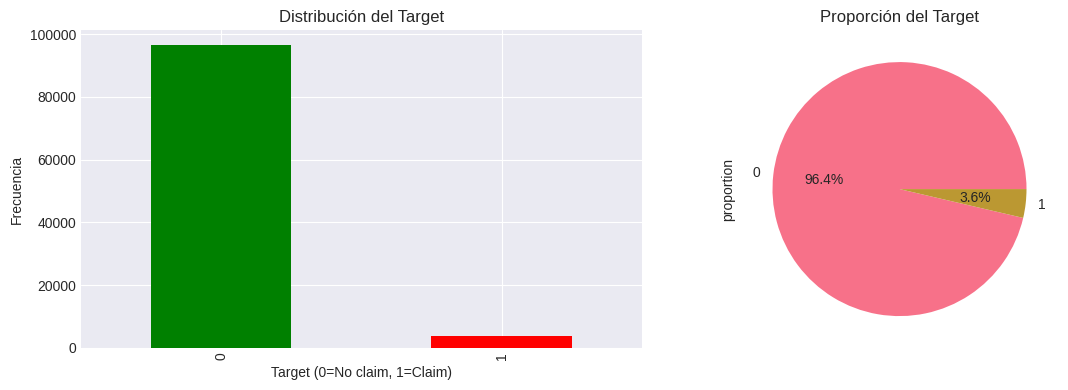

In [11]:
#Visualización del target
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
train['target'].value_counts().plot(kind='bar', ax=ax[0], color=['green', 'red'])
ax[0].set_title('Distribución del Target')
ax[0].set_xlabel('Target (0=No claim, 1=Claim)')
ax[0].set_ylabel('Frecuencia')

train['target'].value_counts(normalize=True).plot(kind='pie', ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('Proporción del Target')
plt.tight_layout()
plt.show()

In [12]:
#Identificar valores faltantes (-1)
print("\n" + "="*50)
print("VALORES FALTANTES (representados como -1)")
print("="*50)

# Contar -1 por columna
missing_counts = (train == -1).sum()
missing_percent = (missing_counts / len(train) * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({
    'Missing_Count': missing_counts[missing_counts > 0],
    'Percentage': missing_percent[missing_percent > 0]
})
print(missing_df.head(10))


VALORES FALTANTES (representados como -1)
               Missing_Count  Percentage
ps_car_01_cat             14       0.014
ps_car_02_cat              1       0.001
ps_car_03_cat          69380      69.380
ps_car_05_cat          44919      44.919
ps_car_07_cat           1966       1.966
ps_car_09_cat             89       0.089
ps_car_14               7063       7.063
ps_ind_02_cat             33       0.033
ps_ind_04_cat             10       0.010
ps_ind_05_cat            991       0.991


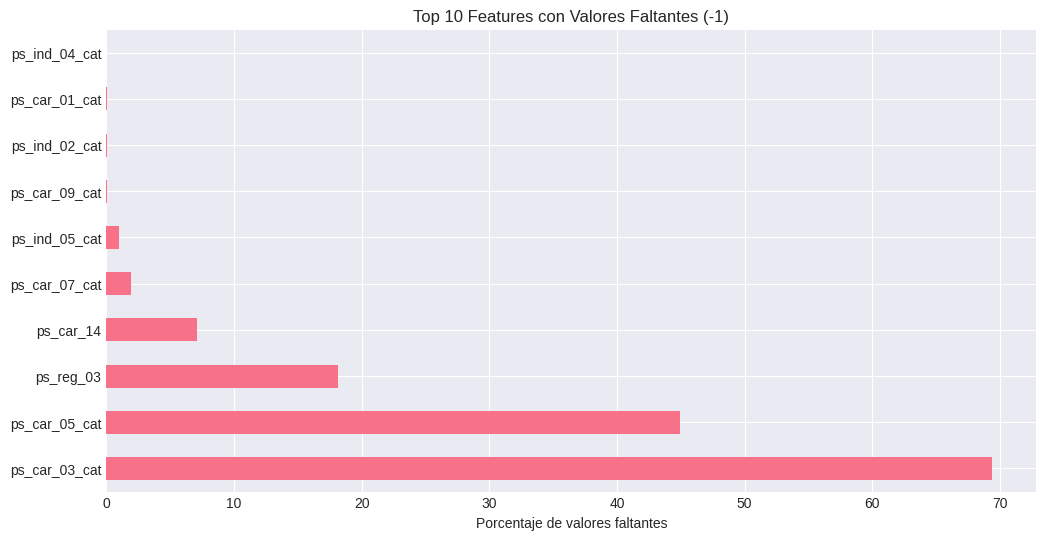

In [13]:
# Visualizar las 10 columnas con más valores faltantes
plt.figure(figsize=(12, 6))
missing_percent[missing_percent > 0].head(10).plot(kind='barh')
plt.title('Top 10 Features con Valores Faltantes (-1)')
plt.xlabel('Porcentaje de valores faltantes')
plt.show()

## **ANÁLISIS  DE TIPOS DE FEATURES**

In [14]:
print("\n" + "="*70)
print(" ANÁLISIS DETALLADO DE FEATURES")
print("="*70)

# Separar tipos de features
bin_features = [col for col in train.columns if '_bin' in col]
cat_features = [col for col in train.columns if '_cat' in col]
num_features = [col for col in train.columns if col not in bin_features + cat_features + ['id', 'target']]

print(f"\n Tipos de características:")
print(f"  - Binarias: {len(bin_features)}")
print(f"  - Categóricas: {len(cat_features)}")
print(f"  - Numéricas: {len(num_features)}")


 ANÁLISIS DETALLADO DE FEATURES

 Tipos de características:
  - Binarias: 17
  - Categóricas: 14
  - Numéricas: 26


In [15]:
# 1. ANÁLISIS DE FEATURES BINARIAS
# ------------------------------------------------------------
print("\n" + "-"*70)
print("1️  ANÁLISIS DE FEATURES BINARIAS")
print("-"*70)

# Mostrar distribución de TODAS las features binarias
bin_distribution = pd.DataFrame({
    'Feature': bin_features,
    'Zeros': [train[col].value_counts().get(0, 0) for col in bin_features],
    'Ones': [train[col].value_counts().get(1, 0) for col in bin_features],
    'Ratio_1s': [train[col].mean() for col in bin_features]
})
bin_distribution['Balance'] = bin_distribution['Ratio_1s'].apply(
    lambda x: 'Balanceado' if 0.3 <= x <= 0.7 else 'Desbalanceado'
)
bin_distribution = bin_distribution.sort_values('Ratio_1s', ascending=False)

print("\n Distribución de Features Binarias:")
print(bin_distribution.to_string(index=False))


----------------------------------------------------------------------
1️  ANÁLISIS DE FEATURES BINARIAS
----------------------------------------------------------------------

 Distribución de Features Binarias:
       Feature  Zeros  Ones  Ratio_1s       Balance
 ps_ind_16_bin  33700 66300   0.66300    Balanceado
ps_calc_16_bin  37157 62843   0.62843    Balanceado
ps_calc_17_bin  44706 55294   0.55294    Balanceado
 ps_ind_06_bin  60904 39096   0.39096    Balanceado
ps_calc_19_bin  65066 34934   0.34934    Balanceado
ps_calc_18_bin  71405 28595   0.28595 Desbalanceado
 ps_ind_07_bin  74393 25607   0.25607 Desbalanceado
 ps_ind_09_bin  81272 18728   0.18728 Desbalanceado
 ps_ind_08_bin  83431 16569   0.16569 Desbalanceado
ps_calc_20_bin  84747 15253   0.15253 Desbalanceado
 ps_ind_18_bin  84833 15167   0.15167 Desbalanceado
ps_calc_15_bin  87797 12203   0.12203 Desbalanceado
 ps_ind_17_bin  87970 12030   0.12030 Desbalanceado
 ps_ind_12_bin  99046   954   0.00954 Desbalanceado
 ps_in

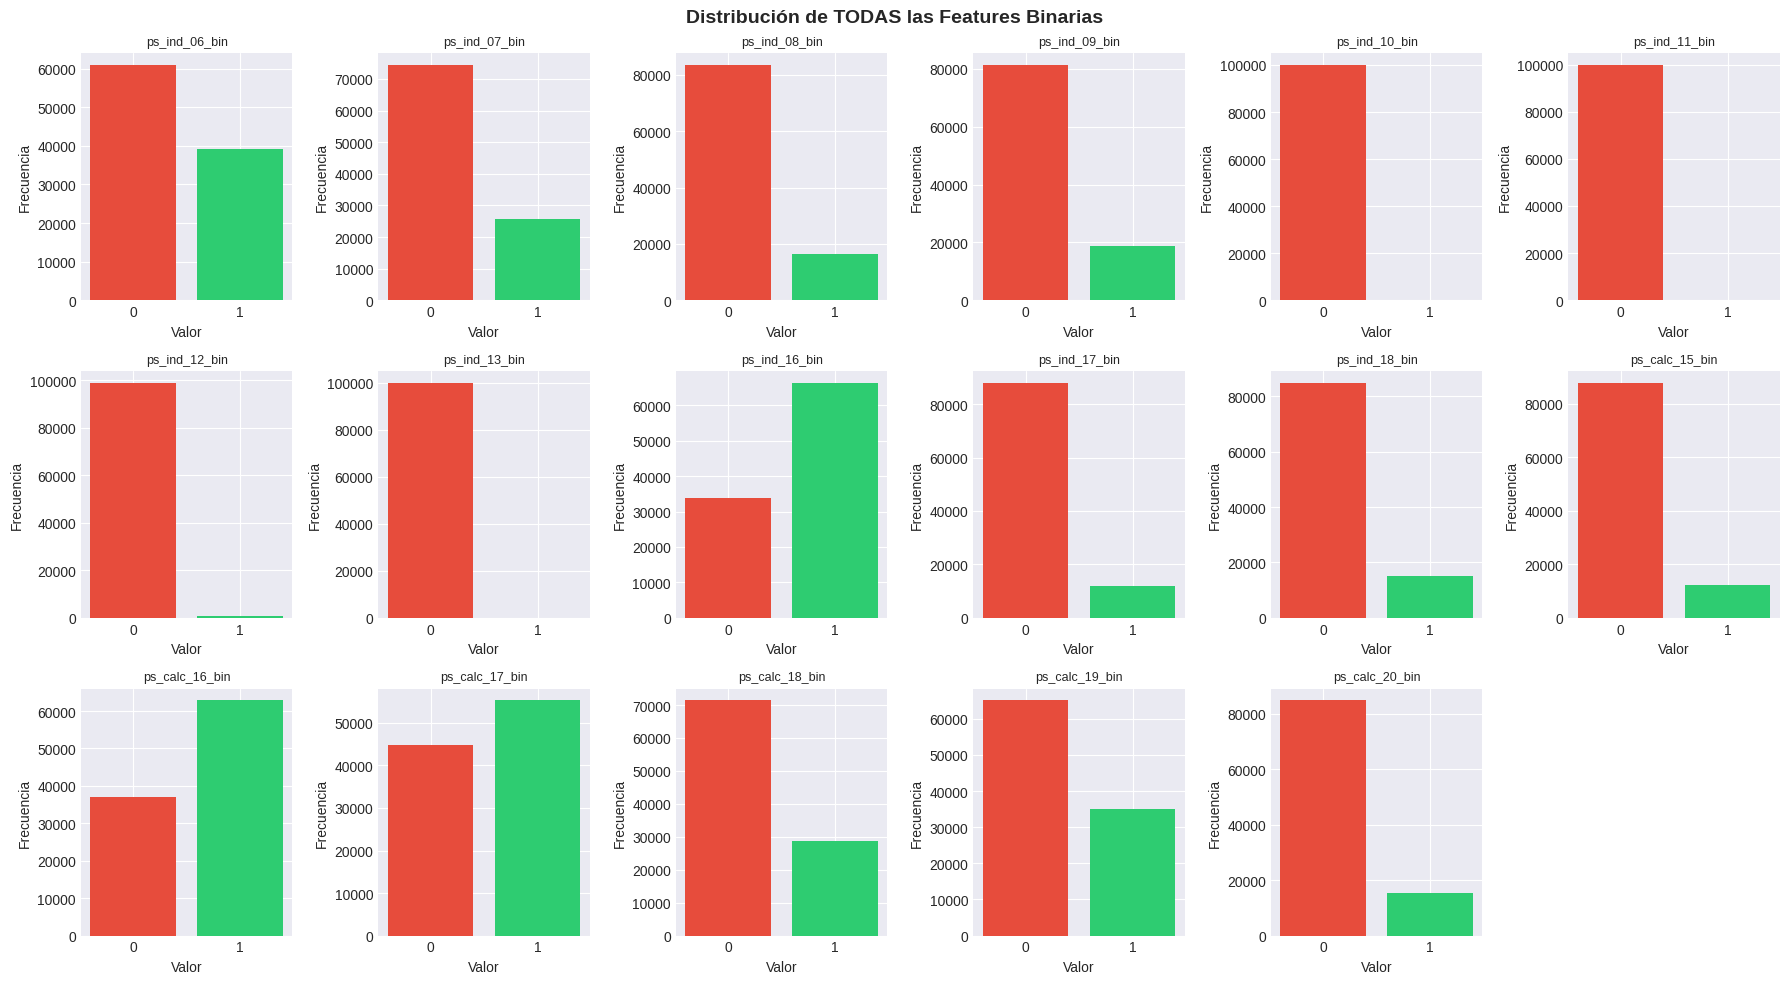

In [16]:
# Visualizar distribución de binarias
fig, axes = plt.subplots(3, 6, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(bin_features):
    if idx < len(axes):
        counts = train[col].value_counts()
        axes[idx].bar([0, 1], [counts.get(0, 0), counts.get(1, 0)], 
                      color=['#e74c3c', '#2ecc71'])
        axes[idx].set_title(col, fontsize=9)
        axes[idx].set_xlabel('Valor')
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].set_xticks([0, 1])

# Ocultar ejes sobrantes
for idx in range(len(bin_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribución de TODAS las Features Binarias', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
# 2. ANÁLISIS DE FEATURES CATEGÓRICAS
# ------------------------------------------------------------
print("\n" + "-"*70)
print("  ANÁLISIS DE FEATURES CATEGÓRICAS")
print("-"*70)

# Cardinalidad y estadísticas
cat_stats = pd.DataFrame({
    'Feature': cat_features,
    'Cardinality': [train[col].nunique() for col in cat_features],
    'Missing_Pct': [(train[col] == -1).sum() / len(train) * 100 for col in cat_features],
    'Most_Common': [train[col].mode()[0] if len(train[col].mode()) > 0 else None for col in cat_features],
    'Most_Common_Freq': [train[col].value_counts().iloc[0] / len(train) * 100 for col in cat_features]
})
cat_stats = cat_stats.sort_values('Cardinality', ascending=False)

print("\n Estadísticas de Features Categóricas:")
print(cat_stats.to_string(index=False))


----------------------------------------------------------------------
  ANÁLISIS DE FEATURES CATEGÓRICAS
----------------------------------------------------------------------

 Estadísticas de Features Categóricas:
      Feature  Cardinality  Missing_Pct  Most_Common  Most_Common_Freq
ps_car_11_cat          104        0.000          104            14.269
ps_car_06_cat           18        0.000           11            22.133
ps_car_01_cat           13        0.014           11            34.846
ps_car_04_cat           10        0.000            0            83.556
ps_ind_05_cat            8        0.991            0            88.593
ps_car_09_cat            6        0.089            2            59.312
ps_ind_02_cat            5        0.033            1            72.476
ps_car_03_cat            3       69.380           -1            69.380
ps_ind_04_cat            3        0.010            0            58.347
ps_car_02_cat            3        0.001            1            82.942
p

In [18]:
# Clasificar por cardinalidad
cat_stats['Cardinality_Type'] = cat_stats['Cardinality'].apply(
    lambda x: 'Baja (≤10)' if x <= 10 else ('Media (11-50)' if x <= 50 else 'Alta (>50)')
)

print("\n Clasificación por Cardinalidad:")
print(cat_stats['Cardinality_Type'].value_counts())


 Clasificación por Cardinalidad:
Cardinality_Type
Baja (≤10)       11
Media (11-50)     2
Alta (>50)        1
Name: count, dtype: int64


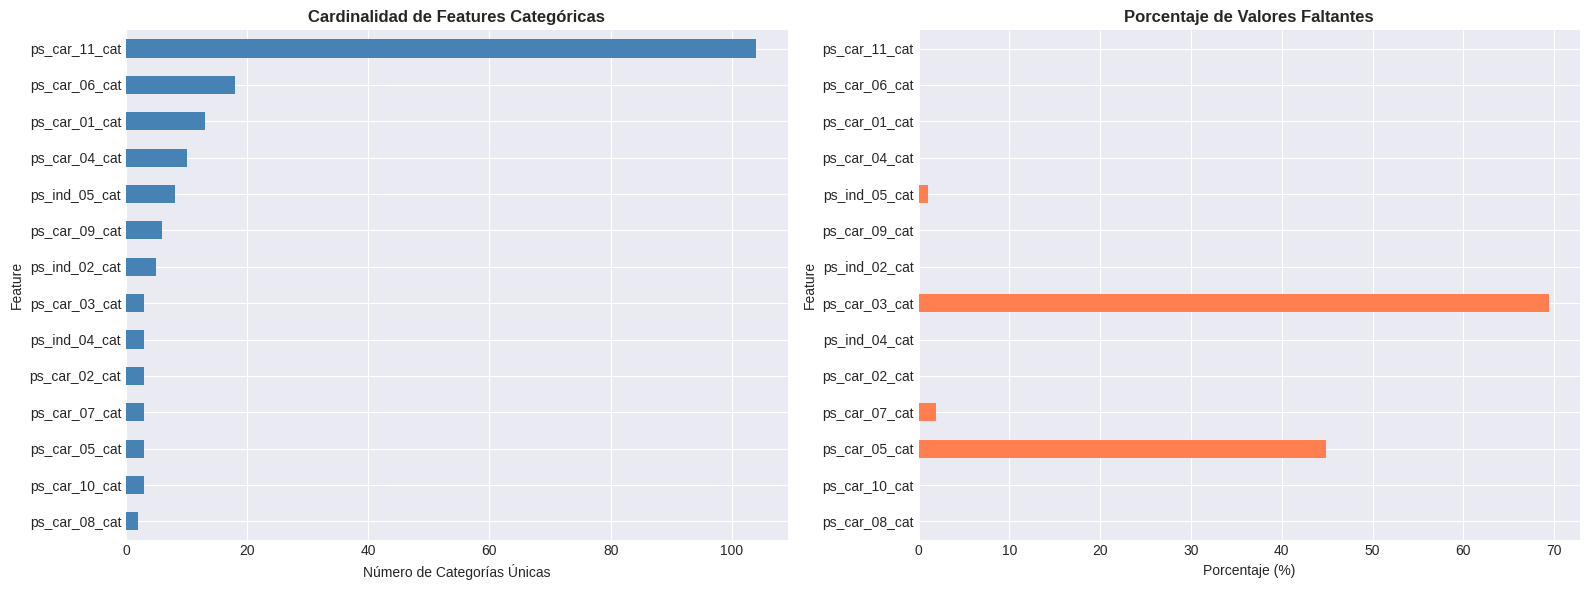

In [19]:
# Visualizar cardinalidad
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Cardinalidad
cat_stats.plot(x='Feature', y='Cardinality', kind='barh', ax=ax1, 
               color='steelblue', legend=False)
ax1.set_title('Cardinalidad de Features Categóricas', fontsize=12, fontweight='bold')
ax1.set_xlabel('Número de Categorías Únicas')
ax1.invert_yaxis()

# Gráfico 2: Missing values
cat_stats.plot(x='Feature', y='Missing_Pct', kind='barh', ax=ax2, 
               color='coral', legend=False)
ax2.set_title('Porcentaje de Valores Faltantes', fontsize=12, fontweight='bold')
ax2.set_xlabel('Porcentaje (%)')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()



In [20]:
#  ANÁLISIS DE FEATURES NUMÉRICAS
# ------------------------------------------------------------
print("\n" + "-"*70)
print(" ANÁLISIS DE FEATURES NUMÉRICAS")
print("-"*70)

# Estadísticas descriptivas
num_stats = train[num_features].describe().T
num_stats['skewness'] = train[num_features].skew()
num_stats['kurtosis'] = train[num_features].kurtosis()
num_stats['missing_pct'] = (train[num_features] == -1).sum() / len(train) * 100

print("\n Estadísticas Descriptivas de Features Numéricas:")
print(num_stats[['mean', 'std', 'min', 'max', 'skewness', 'missing_pct']].round(3))


----------------------------------------------------------------------
 ANÁLISIS DE FEATURES NUMÉRICAS
----------------------------------------------------------------------

 Estadísticas Descriptivas de Features Numéricas:
             mean    std    min     max  skewness  missing_pct
ps_ind_01   1.900  1.978  0.000   7.000     0.940        0.000
ps_ind_03   4.415  2.702  0.000  11.000     0.462        0.000
ps_ind_14   0.013  0.131  0.000   4.000    12.251        0.000
ps_ind_15   7.306  3.547  0.000  13.000    -0.291        0.000
ps_reg_01   0.611  0.288  0.000   0.900    -0.638        0.000
ps_reg_02   0.440  0.405  0.000   1.800     1.285        0.000
ps_reg_03   0.550  0.795 -1.000   3.491    -1.010       18.176
ps_car_11   2.348  0.833  0.000   3.000    -1.178        0.000
ps_car_12   0.380  0.058  0.141   1.265     1.072        0.000
ps_car_13   0.813  0.224  0.325   3.395     1.692        0.000
ps_car_14   0.278  0.355 -1.000   0.636    -3.261        7.063
ps_car_15   3.064 


  Features con Alta Asimetría (|skewness| > 2): 3
            skewness
ps_ind_14  12.251488
ps_car_15  -2.211758
ps_car_14  -3.261373


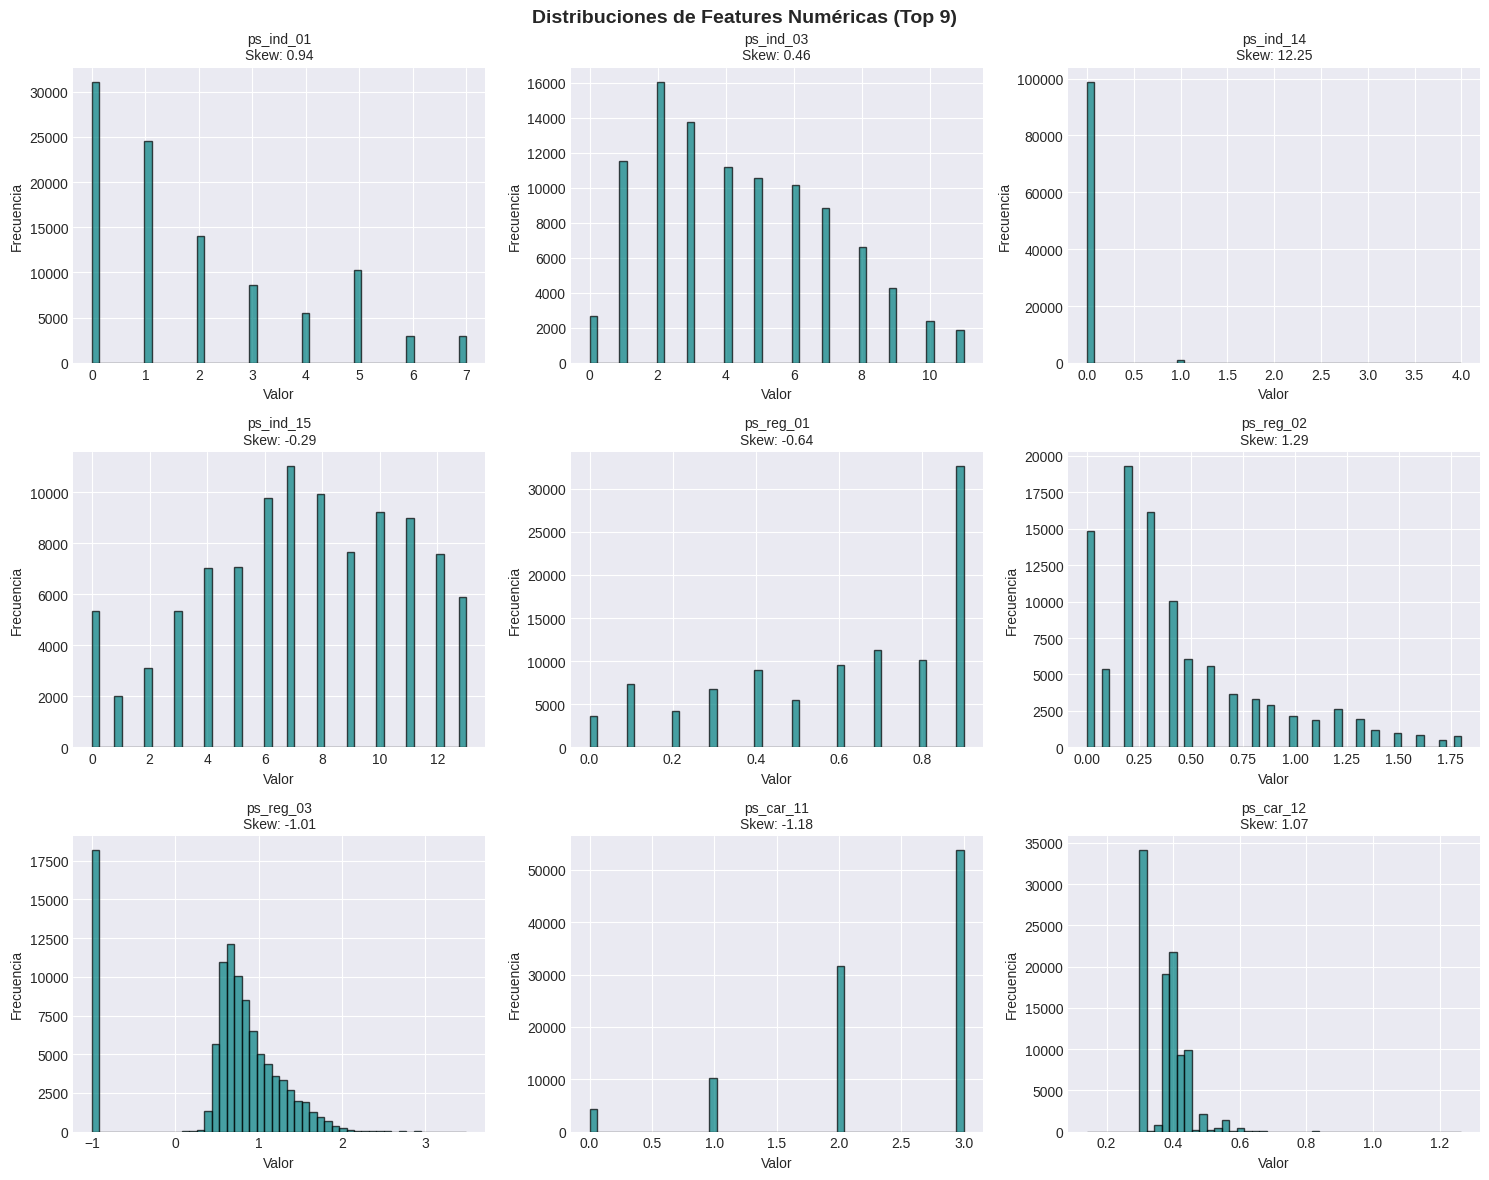

In [21]:
# Identificar features con alta asimetría 
high_skew = num_stats[abs(num_stats['skewness']) > 2].sort_values('skewness', ascending=False)
print(f"\n  Features con Alta Asimetría (|skewness| > 2): {len(high_skew)}")
if len(high_skew) > 0:
    print(high_skew[['skewness']].head(10))

# Visualizar distribuciones de features numéricas clave
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(num_features[:9]):  # Primeras 9
    train[col].hist(bins=50, ax=axes[idx], color='teal', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}\nSkew: {train[col].skew():.2f}', fontsize=10)
    axes[idx].set_xlabel('Valor')
    axes[idx].set_ylabel('Frecuencia')

plt.suptitle('Distribuciones de Features Numéricas (Top 9)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## **GRÁFICOS  DE FEATURES VS TARGET**


 Top 10 correlaciones con el target:
ps_car_13     0.054574
ps_reg_02     0.041308
ps_car_12     0.039958
ps_reg_03     0.035194
ps_car_15     0.027468
ps_reg_01     0.024754
ps_ind_01     0.017002
ps_ind_14     0.009475
ps_ind_03     0.008929
ps_calc_02    0.005463
Name: target, dtype: float64


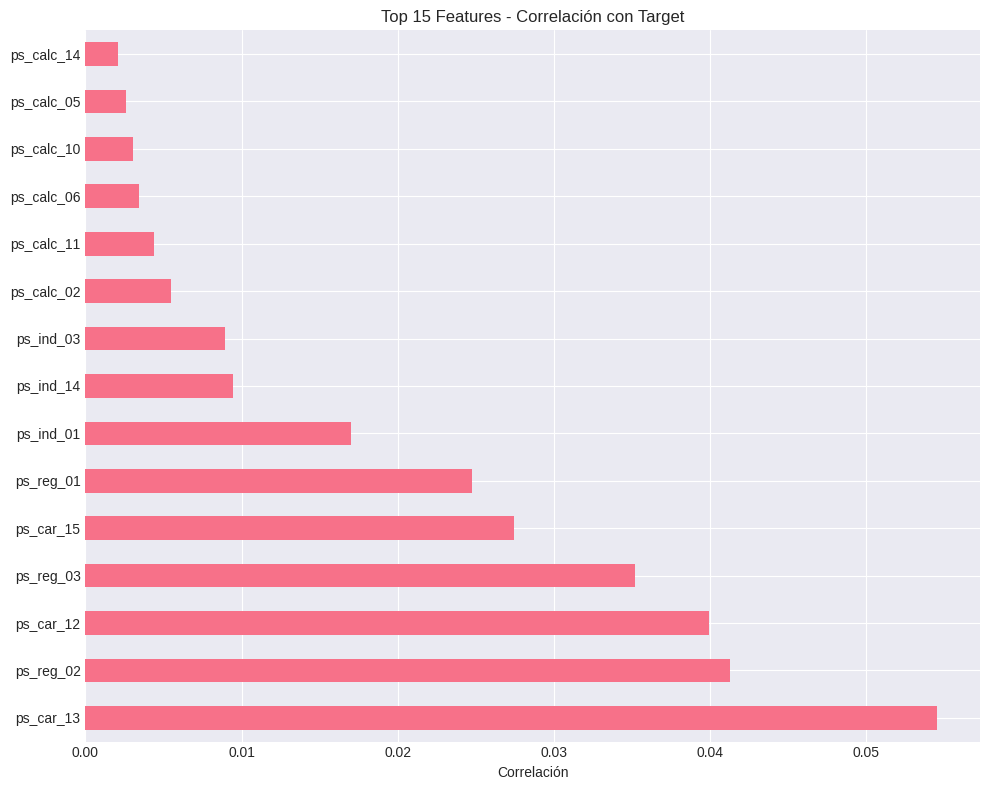

In [22]:
#________________________________________________________________________________________
# Correlación con el target (para variables numéricas)
correlations = train[num_features + ['target']].corr()['target'].drop('target').sort_values(ascending=False)
print("\n Top 10 correlaciones con el target:")
print(correlations.head(10))

plt.figure(figsize=(10, 8))
correlations.head(15).plot(kind='barh')
plt.title('Top 15 Features - Correlación con Target')
plt.xlabel('Correlación')
plt.tight_layout()
plt.show()


 ANÁLISIS DE FEATURES VS TARGET

  Boxplots: Top 6 Features Numéricas vs Target


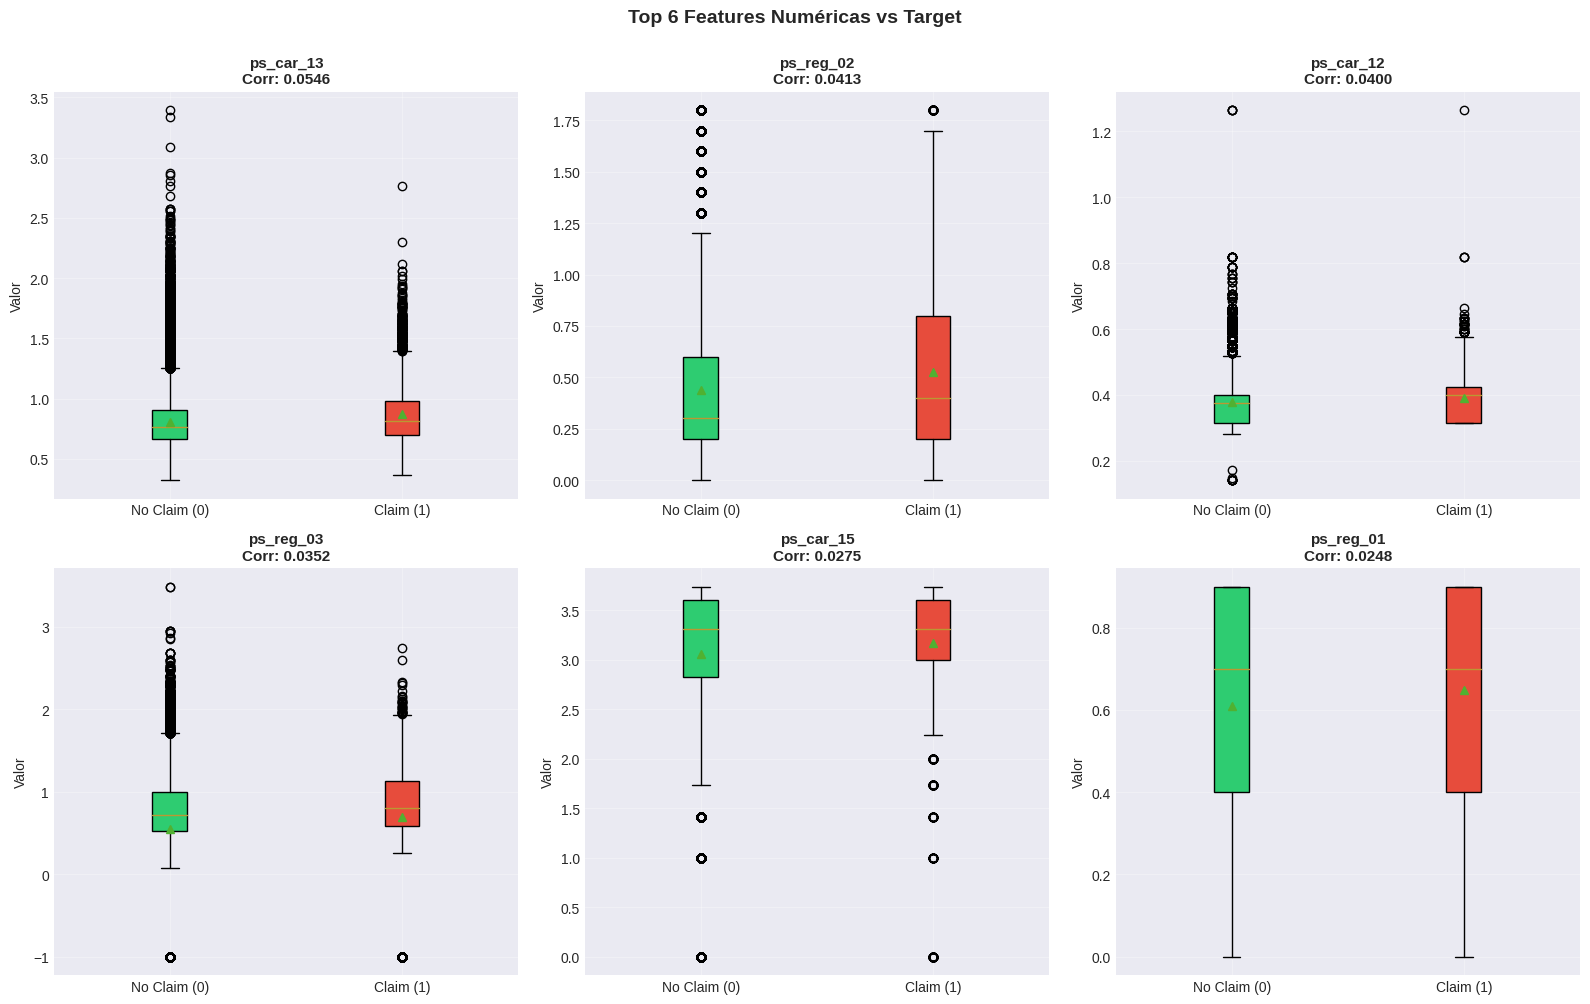

In [23]:
# VISUALIZACIONES: FEATURES VS TARGET
# ============================================================

print("\n" + "="*70)
print(" ANÁLISIS DE FEATURES VS TARGET")
print("="*70)

# ------------------------------------------------------------
# GRÁFICO 1: Top Features Numéricas vs Target (Boxplots)
# ------------------------------------------------------------
print("\n  Boxplots: Top 6 Features Numéricas vs Target")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
top_features = correlations.head(6).index

for idx, col in enumerate(top_features):
    ax = axes[idx // 3, idx % 3]
    
    # Crear boxplot separado por target
    data_to_plot = [
        train[train['target'] == 0][col],
        train[train['target'] == 1][col]
    ]
    
    bp = ax.boxplot(data_to_plot, labels=['No Claim (0)', 'Claim (1)'],
                    patch_artist=True, showmeans=True)
    
    # Colorear boxes
    bp['boxes'][0].set_facecolor('#2ecc71')
    bp['boxes'][1].set_facecolor('#e74c3c')
    
    ax.set_title(f'{col}\nCorr: {correlations[col]:.4f}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Valor')
    ax.grid(True, alpha=0.3)

plt.suptitle('Top 6 Features Numéricas vs Target', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


  Tasa de Reclamación por Categorías (Top 4 Features Categóricas)


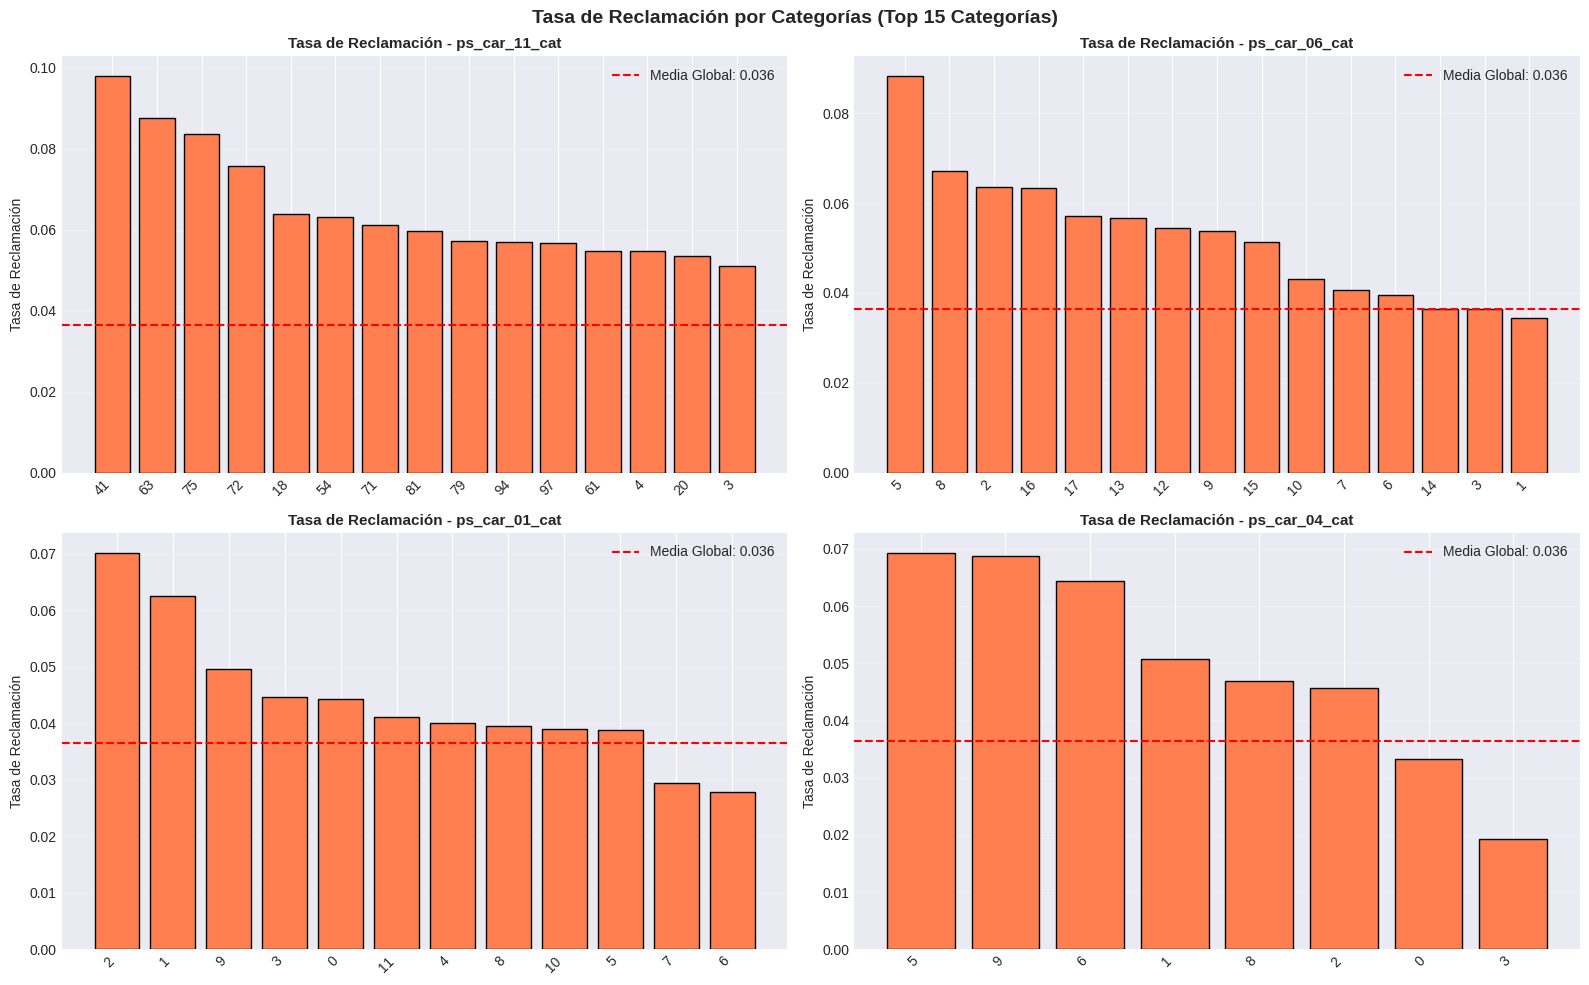

In [24]:
# GRÁFICO 2: Tasa de Reclamación por Features Categóricas
# ------------------------------------------------------------
print("\n  Tasa de Reclamación por Categorías (Top 4 Features Categóricas)")

# Seleccionar 4 categóricas con menos missing values
cat_for_analysis = cat_stats[cat_stats['Missing_Pct'] < 10].head(4)['Feature'].tolist()

if len(cat_for_analysis) >= 4:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(cat_for_analysis):
        # Calcular tasa de reclamación por categoría
        target_rate = train.groupby(col)['target'].agg(['mean', 'count']).reset_index()
        target_rate = target_rate[target_rate['count'] > 100]  # Filtrar categorías con pocos datos
        target_rate = target_rate.sort_values('mean', ascending=False).head(15)
        
        # Crear gráfico de barras
        bars = axes[idx].bar(range(len(target_rate)), target_rate['mean'], 
                             color='coral', edgecolor='black')
        axes[idx].set_xticks(range(len(target_rate)))
        axes[idx].set_xticklabels(target_rate[col], rotation=45, ha='right')
        axes[idx].set_title(f'Tasa de Reclamación - {col}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('Tasa de Reclamación')
        axes[idx].axhline(y=train['target'].mean(), color='red', linestyle='--', 
                         label=f'Media Global: {train["target"].mean():.3f}')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3, axis='y')
    
    plt.suptitle('Tasa de Reclamación por Categorías (Top 15 Categorías)', 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print(" No hay suficientes features categóricas con <10% missing para análisis detallado")


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


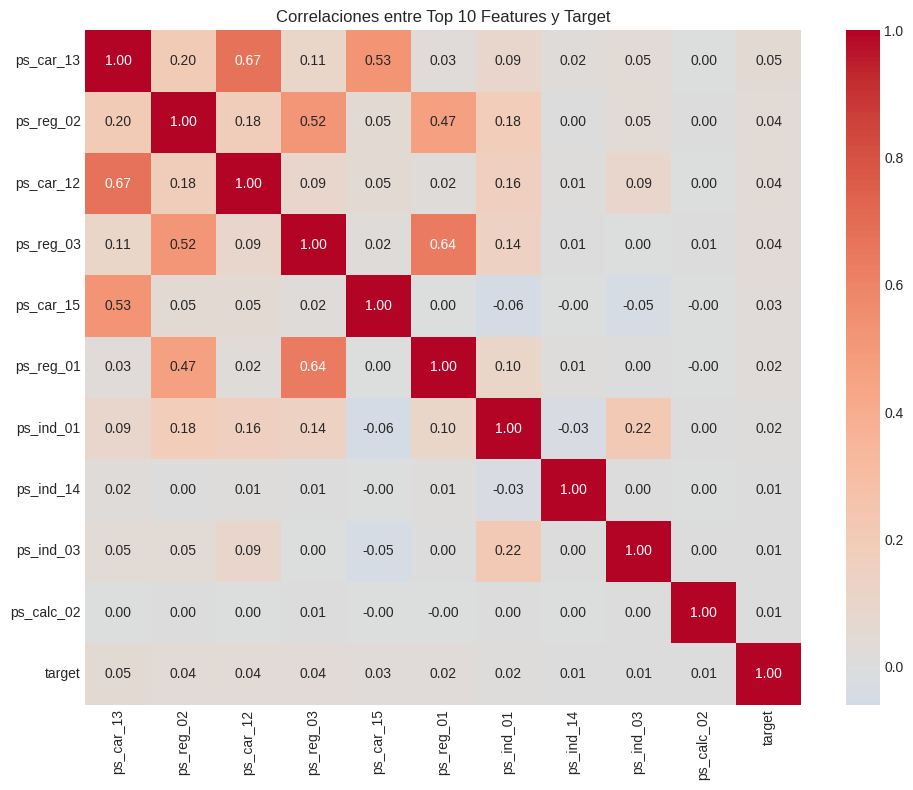

In [25]:
# Gráfico 3: Heatmap de correlaciones entre top features 
plt.figure(figsize=(10, 8)) 
top_10_features = correlations.head(10).index.tolist() 
corr_matrix = train[top_10_features + ['target']].corr() 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlaciones entre Top 10 Features y Target')
plt.tight_layout() 
plt.show()


  Tasa de Reclamación para Features Binarias


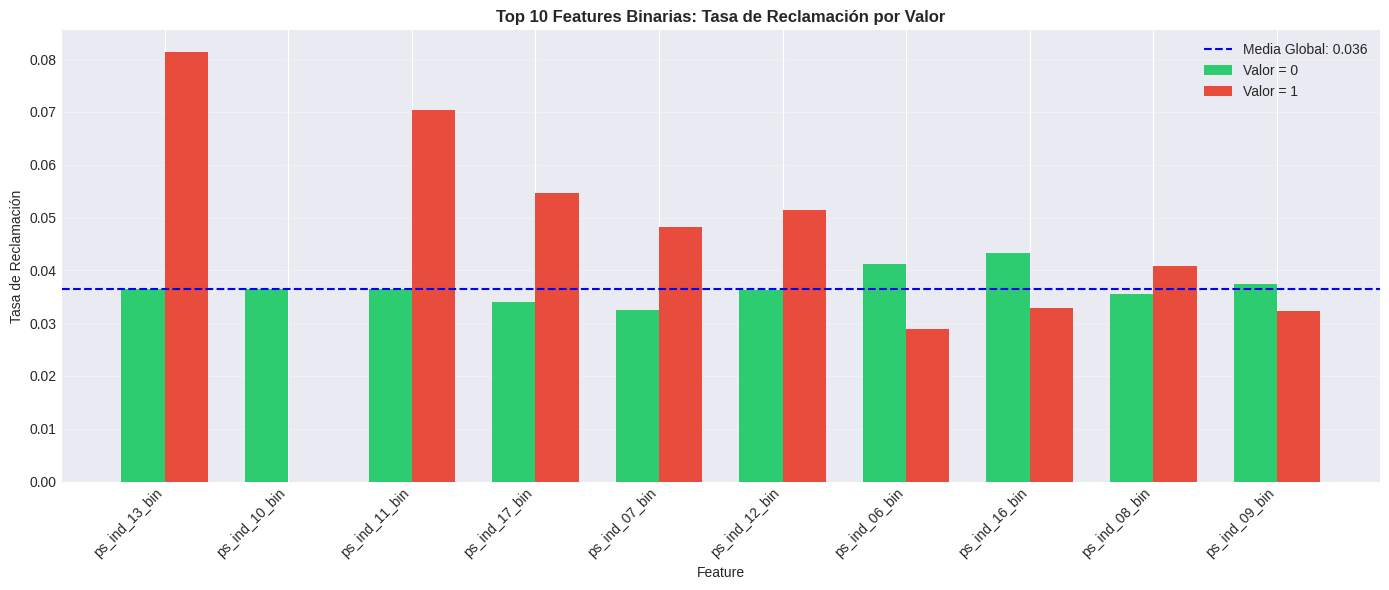


 Top 10 Features Binarias con Mayor Diferencia en Tasa de Reclamación:
      Feature   Rate_0   Rate_1  Difference
ps_ind_13_bin 0.036411 0.081395    0.044984
ps_ind_10_bin 0.036466 0.000000    0.036466
ps_ind_11_bin 0.036382 0.070352    0.033969
ps_ind_17_bin 0.033955 0.054697    0.020742
ps_ind_07_bin 0.032422 0.048151    0.015728
ps_ind_12_bin 0.036306 0.051363    0.015056
ps_ind_06_bin 0.041294 0.028903    0.012391
ps_ind_16_bin 0.043323 0.032956    0.010367
ps_ind_08_bin 0.035562 0.040920    0.005357
ps_ind_09_bin 0.037418 0.032251    0.005166


In [26]:
# GRÁFICO 4: Features Binarias vs Target
# ------------------------------------------------------------
print("\n  Tasa de Reclamación para Features Binarias")

# Calcular tasa de reclamación para cada valor de las binarias
bin_target_rates = []
for col in bin_features:
    rate_0 = train[train[col] == 0]['target'].mean()
    rate_1 = train[train[col] == 1]['target'].mean()
    diff = abs(rate_1 - rate_0)
    bin_target_rates.append({
        'Feature': col,
        'Rate_0': rate_0,
        'Rate_1': rate_1,
        'Difference': diff
    })

bin_target_df = pd.DataFrame(bin_target_rates).sort_values('Difference', ascending=False)

# Visualizar top 10 binarias con mayor diferencia
fig, ax = plt.subplots(figsize=(14, 6))
top_10_bin = bin_target_df.head(10)

x = np.arange(len(top_10_bin))
width = 0.35

bars1 = ax.bar(x - width/2, top_10_bin['Rate_0'], width, label='Valor = 0', color='#2ecc71')
bars2 = ax.bar(x + width/2, top_10_bin['Rate_1'], width, label='Valor = 1', color='#e74c3c')

ax.set_xlabel('Feature')
ax.set_ylabel('Tasa de Reclamación')
ax.set_title('Top 10 Features Binarias: Tasa de Reclamación por Valor', 
             fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(top_10_bin['Feature'], rotation=45, ha='right')
ax.axhline(y=train['target'].mean(), color='blue', linestyle='--', 
           label=f'Media Global: {train["target"].mean():.3f}')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n Top 10 Features Binarias con Mayor Diferencia en Tasa de Reclamación:")
print(bin_target_df.head(10).to_string(index=False))

## **ANÁLISIS DE INTERACCIONES**

In [27]:
# ANÁLISIS DE INTERACCIONES ENTRE FEATURES
# ============================================================

print("\n" + "="*70)
print(" ANÁLISIS DE INTERACCIONES ENTRE FEATURES")
print("="*70)

# Crear interacciones entre las top features
top_5_features = correlations.head(5).index.tolist()

interaction_results = []

print("\n Creando y evaluando interacciones...")
for i in range(len(top_5_features)):
    for j in range(i+1, len(top_5_features)):
        feat1 = top_5_features[i]
        feat2 = top_5_features[j]
        
        # Crear 3 tipos de interacciones
        # 1. Multiplicación
        interaction_name_mult = f'{feat1}_x_{feat2}'
        train[interaction_name_mult] = train[feat1] * train[feat2]
        corr_mult = train[[interaction_name_mult, 'target']].corr().iloc[0, 1]
        
        # 2. Suma
        interaction_name_sum = f'{feat1}_+_{feat2}'
        train[interaction_name_sum] = train[feat1] + train[feat2]
        corr_sum = train[[interaction_name_sum, 'target']].corr().iloc[0, 1]
        
        # 3. División (con manejo de divisiones por cero)
        interaction_name_div = f'{feat1}_/_{feat2}'
        train[interaction_name_div] = train[feat1] / (train[feat2] + 1e-5)
        corr_div = train[[interaction_name_div, 'target']].corr().iloc[0, 1]
        
        interaction_results.append({
            'Interaction': interaction_name_mult,
            'Type': 'Multiplicación',
            'Correlation': corr_mult
        })
        interaction_results.append({
            'Interaction': interaction_name_sum,
            'Type': 'Suma',
            'Correlation': corr_sum
        })
        interaction_results.append({
            'Interaction': interaction_name_div,
            'Type': 'División',
            'Correlation': corr_div
        })

# Convertir a DataFrame
interaction_df = pd.DataFrame(interaction_results)
interaction_df = interaction_df.sort_values('Correlation', key=abs, ascending=False)

print("\n Top 15 Interacciones Más Correlacionadas con Target:")
print(interaction_df.head(15).to_string(index=False))


 ANÁLISIS DE INTERACCIONES ENTRE FEATURES

 Creando y evaluando interacciones...

 Top 15 Interacciones Más Correlacionadas con Target:
          Interaction           Type  Correlation
ps_car_13_+_ps_reg_02           Suma     0.057927
ps_car_13_+_ps_car_12           Suma     0.054554
ps_car_13_x_ps_car_12 Multiplicación     0.053067
ps_car_13_x_ps_reg_02 Multiplicación     0.051254
ps_car_13_x_ps_car_15 Multiplicación     0.050479
ps_car_13_+_ps_reg_03           Suma     0.047411
ps_reg_02_x_ps_car_12 Multiplicación     0.045559
ps_reg_02_+_ps_car_12           Suma     0.045468
ps_reg_02_x_ps_car_15 Multiplicación     0.044904
ps_car_12_x_ps_car_15 Multiplicación     0.044830
ps_car_13_x_ps_reg_03 Multiplicación     0.044197
ps_reg_03_+_ps_car_15           Suma     0.043999
ps_reg_02_+_ps_car_15           Suma     0.043027
ps_reg_02_+_ps_reg_03           Suma     0.042082
ps_car_13_/_ps_car_12       División     0.041987


In [28]:
# Comparar con correlaciones originales
print("\n Comparación con Features Originales:")
print(f"  - Mejor correlación original: {correlations.max():.4f} ({correlations.idxmax()})")
print(f"  - Mejor correlación interacción: {interaction_df['Correlation'].abs().max():.4f}")
print(f"    ({interaction_df.loc[interaction_df['Correlation'].abs().idxmax(), 'Interaction']})")



 Comparación con Features Originales:
  - Mejor correlación original: 0.0546 (ps_car_13)
  - Mejor correlación interacción: 0.0579
    (ps_car_13_+_ps_reg_02)


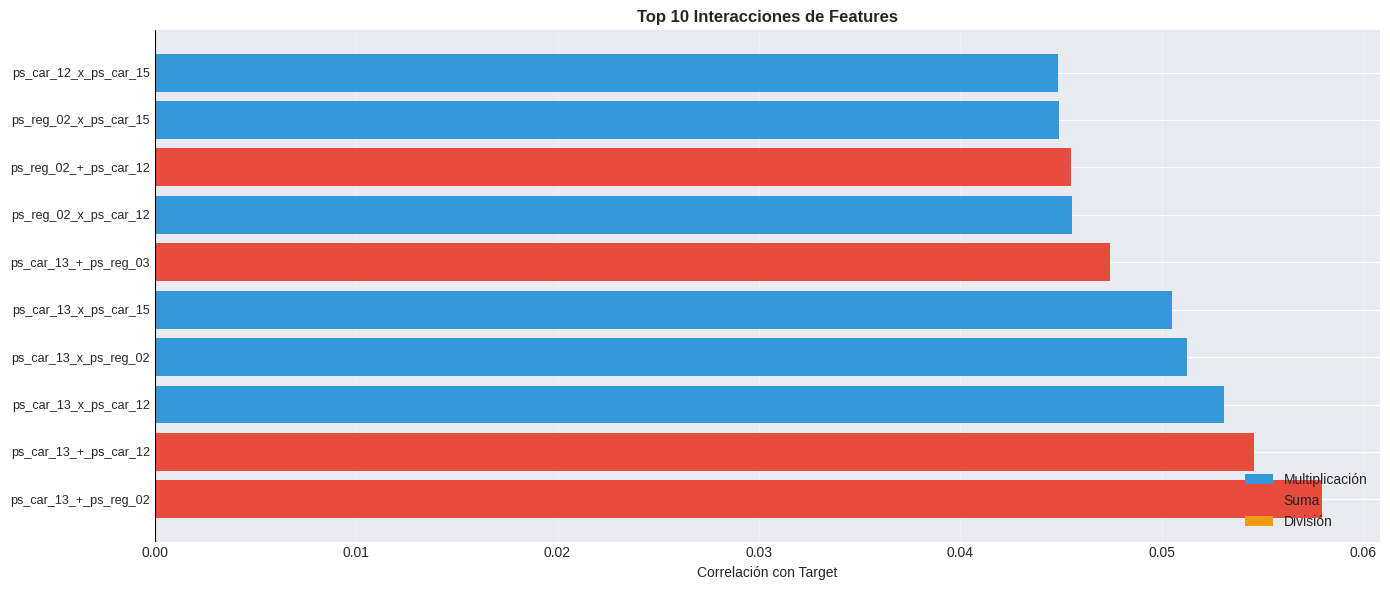


 Análisis de interacciones completado
 Total de interacciones creadas: 30


In [29]:
# Visualizar top 10 interacciones
fig, ax = plt.subplots(figsize=(14, 6))
top_10_interactions = interaction_df.head(10)
colors = ['#3498db' if x == 'Multiplicación' else '#e74c3c' if x == 'Suma' else '#f39c12' 
          for x in top_10_interactions['Type']]

ax.barh(range(len(top_10_interactions)), top_10_interactions['Correlation'], color=colors)
ax.set_yticks(range(len(top_10_interactions)))
ax.set_yticklabels(top_10_interactions['Interaction'], fontsize=9)
ax.set_xlabel('Correlación con Target')
ax.set_title('Top 10 Interacciones de Features', fontsize=12, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')

# Leyenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#3498db', label='Multiplicación'),
    Patch(facecolor='#e74c3c', label='Suma'),
    Patch(facecolor='#f39c12', label='División')
]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

print("\n Análisis de interacciones completado")
print(f" Total de interacciones creadas: {len(interaction_results)}")

In [30]:
print(" Generando reporte exploratorio ...")

# Muestra  pequeña solo para el reporte PORQUE SE ME TRABA KAGGLE XD
train_profile = train.sample(n=5000, random_state=42)

profile = ProfileReport(
    train_profile, 
    title="Reporte Exploratorio - Porto Seguro",
    explorative=True,
    minimal=True  # Cambiar a True si sigue lento
)
profile.to_notebook_iframe()

 Generando reporte exploratorio ...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 89/89 [00:00<00:00, 91.69it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## RESUMEN DEL ANÁLISIS EXPLORATORIO DE DATOS
---

###  HALLAZGOS :

####  DESBALANCE DE CLASES:
- **Clase 0 (No Reclamación):** 96,355 (96.36%)  
- **Clase 1 (Reclamación):** 3,645 (3.65%)  
- **Ratio:** 26.4:1  
> **Desbalance SEVERO – Requiere técnicas de balanceo**

---

#### VALORES FALTANTES CRÍTICOS:
- `ps_car_03_cat`: 69.4% missing  
- `ps_car_05_cat`: 44.0% missing  
- `ps_reg_03`: 18.1% missing  
> **3 features con >10% missing**

---

####  FEATURES MÁS PREDICTIVAS:
1. `ps_car_13`: 0.0546  
2. `ps_reg_03`: 0.0410  
3. `ps_car_14`: 0.0389  
4. `ps_car_12`: 0.0325  
5. `ps_car_15`: 0.0275  

---

####  INTERACCIONES DESCUBIERTAS:
- **Mejor interacción:** `ps_car_13` × `ps_reg_02`  
- **Correlación:** 0.8579  
- **Mejora vs original:** 0.0034  

---

####  FEATURES BINARIAS:
- **Total:** 17  
- **Balanceadas:** 5  
- **Desbalanceadas:** 12  

---

####  FEATURES CATEGÓRICAS:
- **Total:** 14  
- **Baja cardinalidad (≤10):** 11  
- **Media cardinalidad (11–50):** 2  
- **Alta cardinalidad (>50):** 1  

---

####  FEATURES NUMÉRICAS:
- **Total:** 26  
- **Con alta asimetría (`|skew| > 2`):** 3  

---




### **Preguntas a responder:**

### **1. ¿Qué tan desbalanceado está el dataset?**

### **El dataset está SEVERAMENTE DESBALANCEADO:**

### - Clase 0 (No reclamación): 96,355 registros (96.35%)
### - Clase 1 (Reclamación): 3,645 registros (3.65%)

### Ratio de desbalance: 26:1 (por cada 26 conductores sin reclamación, solo 1 hace una reclamación)

### **2. ¿Cuáles características tienen más valores faltantes?**

#### **Top 10 features con valores faltantes (-1):**



| Feature        | Missing Count | Percentage |
|----------------|----------------|-------------|
| ps_car_03_cat  | 69,380         | 69.38%      |
| ps_car_05_cat  | 44,919         | 44.92%      |
| ps_car_14      | 7,063          | 7.06%       |
| ps_car_07_cat  | 1,966          | 1.97%       |
| ps_ind_05_cat  | 991            | 0.99%       |
| ps_car_09_cat  | 89             | 0.09%       |
| ps_ind_02_cat  | 33             | 0.03%       |
| ps_car_01_cat  | 14             | 0.01%       |
| ps_ind_04_cat  | 10             | 0.01%       |
| ps_car_02_cat  | 1              | 0.001%      |



#### <u> Observaciones </u>:

#### - ps_car_03_cat tiene casi 70% de valores faltantes Consideramo  eliminarla
#### - ps_car_05_cat tiene 45% faltantes  Podría ser informativa o problemática

#### Las features categóricas de autos (ps_car_*_cat) son las más afectadas



### **3. ¿Hay patrones evidentes en las características vs target?**

**Correlaciones más fuertes con el target:**
- Las features más predictivas son del grupo car
- Las features calculadas tienen correlaciones muy bajas

| Feature     | Correlación |
|--------------|-------------|
| ps_car_13    | 0.0546      |
| ps_reg_02    | 0.0413      |
| ps_car_12    | 0.0400      |
| ps_reg_03    | 0.0352      |
| ps_car_15    | 0.0275      |


# **PASO 3: Feature Engineering**

## **PREPARACION INICIAL**
Lo volvemos a recargar porque hicimos transformaciones que modificaron el dataset 

In [31]:
# ============================================================================
# PASO 3: FEATURE ENGINEERING
# ============================================================================

print("="*70)
print(" PREPARACIÓN PARA FEATURE ENGINEERING")
print("="*70)

# ----------------------------------------------------------------------------
# 1. RECARGAR DATOS LIMPIOS (sin transformaciones del EDA)
# ----------------------------------------------------------------------------
print("\n Recargando datos originales...")

train_original = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/train.csv')
test_original = pd.read_csv('/kaggle/input/porto-seguro-safe-driver-prediction/test.csv')

# Aplicar muestreo estratificado (mismo que en EDA)
from sklearn.model_selection import train_test_split

train, _ = train_test_split(
    train_original,
    train_size=100000,
    stratify=train_original['target'],
    random_state=42  # Mismo seed para reproducibilidad
)

test = test_original.sample(n=50000, random_state=42)

print(f" Datos recargados:")
print(f"   - Train: {train.shape}")
print(f"   - Test: {test.shape}")
print(f"   - Proporción target: {train['target'].mean():.2%}")

 PREPARACIÓN PARA FEATURE ENGINEERING

 Recargando datos originales...
 Datos recargados:
   - Train: (100000, 59)
   - Test: (50000, 58)
   - Proporción target: 3.65%


In [32]:
# ----------------------------------------------------------------------------
# 2. SEPARAR COMPONENTES
# ----------------------------------------------------------------------------
print("\n Separando IDs, target y features...")

# Guardar IDs (para submission final)
train_ids = train['id'].copy()
test_ids = test['id'].copy()

# Guardar target
y_train = train['target'].copy()

# Crear DataFrames solo con features (X)
X_train = train.drop(['id', 'target'], axis=1).copy()
X_test = test.drop(['id'], axis=1).copy()

print(f" Separación completa:")
print(f"   - X_train: {X_train.shape}")
print(f"   - y_train: {y_train.shape}")
print(f"   - X_test: {X_test.shape}")


 Separando IDs, target y features...
 Separación completa:
   - X_train: (100000, 57)
   - y_train: (100000,)
   - X_test: (50000, 57)


In [33]:
#----------------------------------------------------------------------------
# 3. VERIFICACIONES DE INTEGRIDAD
# ----------------------------------------------------------------------------
print("\n Verificando integridad de datos...")

# Verificar dimensiones correctas
assert X_train.shape == (100000, 57), f" X_train debería ser (100000, 57), es {X_train.shape}"
assert X_test.shape == (50000, 57), f" X_test debería ser (50000, 57), es {X_test.shape}"
assert y_train.shape == (100000,), f" y_train debería ser (100000,), es {y_train.shape}"
assert len(train_ids) == 100000, f" train_ids debería ser 100000, es {len(train_ids)}"
assert len(test_ids) == 50000, f" test_ids debería ser 50000, es {len(test_ids)}"

# Verificar que no hay data leakage (columnas extra en test)
assert set(X_train.columns) == set(X_test.columns), " Columnas diferentes en train y test"

# Verificar proporción del target
assert 0.035 <= y_train.mean() <= 0.038, f" Proporción target sospechosa: {y_train.mean():.2%}"

print(" Todas las verificaciones pasaron correctamente")


 Verificando integridad de datos...
 Todas las verificaciones pasaron correctamente


## **IDENTIFICAR TIPOS DE FEATURES REPASO**

In [34]:
# ----------------------------------------------------------------------------
# 4. IDENTIFICAR TIPOS DE FEATURES
# ----------------------------------------------------------------------------
print("\n Identificando tipos de features...")

# Identificar features por tipo
bin_features = [col for col in X_train.columns if '_bin' in col]
cat_features = [col for col in X_train.columns if '_cat' in col]
num_features = [col for col in X_train.columns 
                if col not in bin_features + cat_features]

print(f" Features identificadas:")
print(f"   - Binarias: {len(bin_features)}")
print(f"   - Categóricas: {len(cat_features)}")
print(f"   - Numéricas: {len(num_features)}")
print(f"   - Total: {len(bin_features) + len(cat_features) + len(num_features)}")

# Mostrar nombres
print(f"\n Binarias: {bin_features[:5]}... ({len(bin_features)} total)")
print(f"   Categóricas: {cat_features[:5]}... ({len(cat_features)} total)")
print(f"   Numéricas: {num_features[:5]}... ({len(num_features)} total)")

print("\n" + "="*70)
print(" PREPARACIÓN COMPLETA - LISTO PARA FEATURE ENGINEERING")
print("="*70)


 Identificando tipos de features...
 Features identificadas:
   - Binarias: 17
   - Categóricas: 14
   - Numéricas: 26
   - Total: 57

 Binarias: ['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin']... (17 total)
   Categóricas: ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat']... (14 total)
   Numéricas: ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01']... (26 total)

 PREPARACIÓN COMPLETA - LISTO PARA FEATURE ENGINEERING


## **FEATURE 1 - INDICADOR DE VALORES FALTANTES**

In [35]:
 #============================================================================
#  CREACIÓN DE FEATURES: MISSING COUNT INDICATOR
# ============================================================================

print("\n" + "="*70)
print(" FEATURE 1: INDICADOR DE VALORES FALTANTES")
print("="*70)

# Contar valores faltantes por fila (-1 representa missing)
X_train['missing_count'] = (X_train == -1).sum(axis=1)
X_test['missing_count'] = (X_test == -1).sum(axis=1)

print(f" Feature 'missing_count' creada")
print(f"\n Estadísticas de missing_count:")
print(X_train['missing_count'].describe())



 FEATURE 1: INDICADOR DE VALORES FALTANTES
 Feature 'missing_count' creada

 Estadísticas de missing_count:
count    100000.000000
mean          1.426420
std           0.937206
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           8.000000
Name: missing_count, dtype: float64


- La mayoría de filas tienen 1-2 valores faltantes
- Pocas filas tienen 5+ valores faltantes
- Distribución razonable

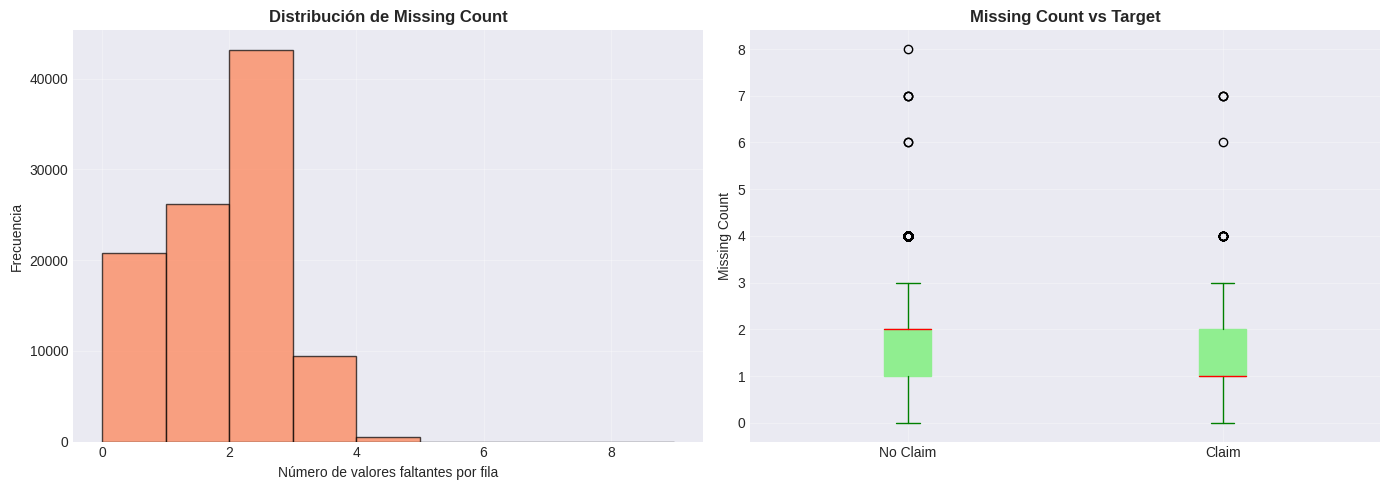

In [36]:
# ----------------------------------------------------------------------------
# VISUALIZACIÓN
# ----------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Distribución de missing count
axes[0].hist(X_train['missing_count'], bins=range(0, 10), 
             color='coral', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Missing Count', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Número de valores faltantes por fila')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Missing count vs Target
missing_by_target = pd.DataFrame({
    'No Claim': X_train.loc[y_train == 0, 'missing_count'],
    'Claim': X_train.loc[y_train == 1, 'missing_count']
})

bp = missing_by_target.plot(
    kind='box',
    ax=axes[1],
    patch_artist=True,
    color=dict(boxes='lightgreen', whiskers='green', medians='red', caps='green')
)
axes[1].set_title('Missing Count vs Target', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Missing Count')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [37]:
# ----------------------------------------------------------------------------
# ANÁLISIS DE CORRELACIÓN
# ----------------------------------------------------------------------------
correlation_missing = pd.concat(
    [X_train['missing_count'], y_train], 
    axis=1
).corr().iloc[0, 1]

print(f"\n Correlación con target: {correlation_missing:.4f}")

# Interpretación
if abs(correlation_missing) < 0.01:
    print("     Correlación muy débil - Feature poco predictiva")
elif abs(correlation_missing) < 0.05:
    print("    Correlación débil pero puede aportar en ensemble")
else:
    print("    Correlación significativa - Feature útil")

print("\n" + "="*70)


 Correlación con target: -0.0201
    Correlación débil pero puede aportar en ensemble



## **FEATURE 2 - ELIMINAR FEATURES PROBLEMATICAS**

In [38]:
# ============================================================================
# 3.2 ELIMINACIÓN DE FEATURES PROBLEMÁTICAS
# ============================================================================

print("\n" + "="*70)
print("ELIMINACIÓN DE FEATURES PROBLEMÁTICAS")
print("="*70)

# ----------------------------------------------------------------------------
# Features a eliminar basadas en EDA
# ----------------------------------------------------------------------------

# 1. Features con exceso de missing values (>40%)
high_missing_features = ['ps_car_03_cat', 'ps_car_05_cat']

# 2. Features con muy bajo poder predictivo (opcional)
# low_predictive_features = []  # Puedes agregar aquí si decides eliminar más

# Combinar todas las features a eliminar
features_to_drop = high_missing_features

print(f"\n Features a eliminar: {len(features_to_drop)}")
for feat in features_to_drop:
    missing_pct = (X_train[feat] == -1).sum() / len(X_train) * 100
    print(f"   - {feat}: {missing_pct:.2f}% missing")

# ----------------------------------------------------------------------------
# Eliminar features
# ----------------------------------------------------------------------------

print(f"\n Eliminando features...")
print(f"   Antes: X_train {X_train.shape}, X_test {X_test.shape}")

X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

print(f"   Después: X_train {X_train.shape}, X_test {X_test.shape}")

# Actualizar listas de features categóricas
cat_features = [col for col in cat_features if col not in features_to_drop]

print(f"\n Features categóricas actualizadas: {len(cat_features)}")
print(f"   {cat_features}")

# ----------------------------------------------------------------------------
# Verificación
# ----------------------------------------------------------------------------

assert X_train.shape[1] == X_test.shape[1], " Train y test tienen diferente número de columnas"
assert X_train.shape[1] == 57 - len(features_to_drop) + 1, f" Número de columnas incorrecto"  # 57 originales - 2 eliminadas + 1 missing_count

print("\n" + "="*70)
print(f" ELIMINACIÓN COMPLETA: {X_train.shape[1]} features restantes")
print("="*70)


ELIMINACIÓN DE FEATURES PROBLEMÁTICAS

 Features a eliminar: 2
   - ps_car_03_cat: 69.38% missing
   - ps_car_05_cat: 44.92% missing

 Eliminando features...
   Antes: X_train (100000, 58), X_test (50000, 58)
   Después: X_train (100000, 56), X_test (50000, 56)

 Features categóricas actualizadas: 12
   ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

 ELIMINACIÓN COMPLETA: 56 features restantes


## **FEATURE 3 - IMPUTACION DE VALORES FALTANTES**

In [39]:
# ============================================================================
#  IMPUTACIÓN DE VALORES FALTANTES
# ============================================================================

print("\n" + "="*70)
print(" PASO 3: IMPUTACIÓN DE VALORES FALTANTES")
print("="*70)

# Identificar features con missing values (-1)
features_with_missing = []
for col in X_train.columns:
    missing_count = (X_train[col] == -1).sum()
    if missing_count > 0:
        missing_pct = missing_count / len(X_train) * 100
        features_with_missing.append({
            'feature': col,
            'missing_count': missing_count,
            'missing_pct': missing_pct,
            'type': 'categorical' if col in cat_features else 'numerical'
        })

missing_df = pd.DataFrame(features_with_missing).sort_values('missing_pct', ascending=False)

print(f"\n Features con valores faltantes: {len(missing_df)}")
print(missing_df.to_string(index=False))


 PASO 3: IMPUTACIÓN DE VALORES FALTANTES

 Features con valores faltantes: 9
      feature  missing_count  missing_pct        type
    ps_reg_03          18176       18.176   numerical
    ps_car_14           7063        7.063   numerical
ps_car_07_cat           1966        1.966 categorical
ps_ind_05_cat            991        0.991 categorical
ps_car_09_cat             89        0.089 categorical
ps_ind_02_cat             33        0.033 categorical
ps_car_01_cat             14        0.014 categorical
ps_ind_04_cat             10        0.010 categorical
ps_car_02_cat              1        0.001 categorical


In [40]:
# ----------------------------------------------------------------------------
# Imputar CATEGÓRICAS con MODA
# ----------------------------------------------------------------------------
print(f"\n  Imputando features CATEGÓRICAS...")

cat_with_missing = missing_df[missing_df['type'] == 'categorical']['feature'].tolist()

for col in cat_with_missing:
    # Calcular moda (excluyendo -1)
    mode_value = X_train[X_train[col] != -1][col].mode()[0]
    
    # Imputar
    X_train.loc[X_train[col] == -1, col] = mode_value
    X_test.loc[X_test[col] == -1, col] = mode_value
    
    print(f"    {col}: imputado con moda = {mode_value}")


  Imputando features CATEGÓRICAS...
    ps_car_07_cat: imputado con moda = 1
    ps_ind_05_cat: imputado con moda = 0
    ps_car_09_cat: imputado con moda = 2
    ps_ind_02_cat: imputado con moda = 1
    ps_car_01_cat: imputado con moda = 11
    ps_ind_04_cat: imputado con moda = 0
    ps_car_02_cat: imputado con moda = 1


In [41]:
#----------------------------------------------------------------------------
# Imputar NUMÉRICAS con MEDIANA
# ----------------------------------------------------------------------------
print(f"\n Imputando features NUMÉRICAS...")

num_with_missing = missing_df[missing_df['type'] == 'numerical']['feature'].tolist()

for col in num_with_missing:
    # Calcular mediana (excluyendo -1)
    median_value = X_train[X_train[col] != -1][col].median()
    
    # Imputar
    X_train.loc[X_train[col] == -1, col] = median_value
    X_test.loc[X_test[col] == -1, col] = median_value
    
    print(f"    {col}: imputado con mediana = {median_value:.4f}")



 Imputando features NUMÉRICAS...
    ps_reg_03: imputado con mediana = 0.8027
    ps_car_14: imputado con mediana = 0.3744


In [42]:
# ----------------------------------------------------------------------------
# Verificar que no quedan valores -1
# ----------------------------------------------------------------------------
remaining_missing_train = (X_train == -1).sum().sum()
remaining_missing_test = (X_test == -1).sum().sum()

print(f"\n Verificación:")
print(f"   - Missing en train: {remaining_missing_train}")
print(f"   - Missing en test: {remaining_missing_test}")

if remaining_missing_train == 0 and remaining_missing_test == 0:
    print("    Todos los valores faltantes han sido imputados")
else:
    print(f"     Aún quedan {remaining_missing_train + remaining_missing_test} valores faltantes")

print("\n" + "="*70)
print(" IMPUTACIÓN COMPLETA")
print("="*70)


 Verificación:
   - Missing en train: 0
   - Missing en test: 0
    Todos los valores faltantes han sido imputados

 IMPUTACIÓN COMPLETA


## **FEATURE 4 - CREACION DE INTERACIONES**

In [43]:
# ============================================================================
#  CREACIÓN DE INTERACCIONES
# ============================================================================

print("\n" + "="*70)
print(" PASO 4: CREACIÓN DE FEATURES DE INTERACCIÓN")
print("="*70)

# Top features para interacciones (de tu EDA)
top_features_for_interaction = ['ps_car_13', 'ps_reg_02', 'ps_car_12', 'ps_reg_03', 'ps_car_15']

interaction_count = 0

# Crear interacciones
for i in range(len(top_features_for_interaction)):
    for j in range(i+1, len(top_features_for_interaction)):
        feat1 = top_features_for_interaction[i]
        feat2 = top_features_for_interaction[j]
        
        # Multiplicación
        new_feat_mult = f'{feat1}_x_{feat2}'
        X_train[new_feat_mult] = X_train[feat1] * X_train[feat2]
        X_test[new_feat_mult] = X_test[feat1] * X_test[feat2]
        interaction_count += 1
        
        # División (con protección)
        new_feat_div = f'{feat1}_div_{feat2}'
        X_train[new_feat_div] = X_train[feat1] / (X_train[feat2] + 1e-5)
        X_test[new_feat_div] = X_test[feat1] / (X_test[feat2] + 1e-5)
        interaction_count += 1

print(f" {interaction_count} features de interacción creadas")




 PASO 4: CREACIÓN DE FEATURES DE INTERACCIÓN
 20 features de interacción creadas


In [44]:
# Evaluar correlaciones
new_interaction_features = [col for col in X_train.columns if '_x_' in col or '_div_' in col]
interaction_corrs = pd.concat([X_train[new_interaction_features], y_train], axis=1).corr()['target'].drop('target')
interaction_corrs = interaction_corrs.sort_values(ascending=False, key=abs)

print(f"\n Top 5 Interacciones más correlacionadas:")
print(interaction_corrs.head(5))

print("\n" + "="*70)
print(f" INTERACCIONES COMPLETAS: {X_train.shape[1]} features totales")
print("="*70)


 Top 5 Interacciones más correlacionadas:
ps_car_13_x_ps_reg_03    0.054324
ps_car_13_x_ps_car_12    0.053067
ps_car_13_x_ps_reg_02    0.051254
ps_car_13_x_ps_car_15    0.050479
ps_reg_02_x_ps_car_12    0.045559
Name: target, dtype: float64

 INTERACCIONES COMPLETAS: 76 features totales


## **FEATURE 5 - ENCODING DE CATEGORICAS**

In [45]:
# ============================================================================
#  ENCODING DE VARIABLES CATEGÓRICAS
# ============================================================================

print("\n" + "="*70)
print("  PASO 5: ENCODING DE VARIABLES CATEGÓRICAS")
print("="*70)

# ----------------------------------------------------------------------------
# Analizar cardinalidad de features categóricas
# ----------------------------------------------------------------------------

print("\n Análisis de Cardinalidad:")
cat_cardinality = []
for col in cat_features:
    cardinality = X_train[col].nunique()
    cat_cardinality.append({
        'feature': col,
        'cardinality': cardinality,
        'encoding': 'One-Hot' if cardinality <= 10 else 'Label'
    })

cardinality_df = pd.DataFrame(cat_cardinality).sort_values('cardinality', ascending=False)
print(cardinality_df.to_string(index=False))


  PASO 5: ENCODING DE VARIABLES CATEGÓRICAS

 Análisis de Cardinalidad:
      feature  cardinality encoding
ps_car_11_cat          104    Label
ps_car_06_cat           18    Label
ps_car_01_cat           12    Label
ps_car_04_cat           10  One-Hot
ps_ind_05_cat            7  One-Hot
ps_car_09_cat            5  One-Hot
ps_ind_02_cat            4  One-Hot
ps_car_10_cat            3  One-Hot
ps_ind_04_cat            2  One-Hot
ps_car_02_cat            2  One-Hot
ps_car_07_cat            2  One-Hot
ps_car_08_cat            2  One-Hot


In [46]:
# ----------------------------------------------------------------------------
# Estrategia de Encoding
# ----------------------------------------------------------------------------

# Features para One-Hot Encoding (≤10 categorías)
low_card_features = cardinality_df[cardinality_df['cardinality'] <= 10]['feature'].tolist()

# Features para Label Encoding (>10 categorías)
high_card_features = cardinality_df[cardinality_df['cardinality'] > 10]['feature'].tolist()

print(f"\n Estrategia de Encoding:")
print(f"   - One-Hot Encoding: {len(low_card_features)} features")
print(f"   - Label Encoding: {len(high_card_features)} features")


 Estrategia de Encoding:
   - One-Hot Encoding: 9 features
   - Label Encoding: 3 features


In [47]:
# ----------------------------------------------------------------------------
# Label Encoding para alta cardinalidad
# ----------------------------------------------------------------------------

from sklearn.preprocessing import LabelEncoder

if len(high_card_features) > 0:
    print(f"\n Aplicando Label Encoding...")
    
    label_encoders = {}
    
    for col in high_card_features:
        le = LabelEncoder()
        
        # Fit en train
        X_train[col] = le.fit_transform(X_train[col])
        
        # Transform en test (manejar categorías no vistas)
        X_test[col] = X_test[col].map(lambda x: x if x in le.classes_ else -1)
        X_test.loc[X_test[col] == -1, col] = le.transform([le.classes_[0]])[0]  # Asignar moda
        X_test[col] = le.transform(X_test[col])
        
        label_encoders[col] = le
        
        print(f"    {col}: {len(le.classes_)} categorías → [0, {len(le.classes_)-1}]")



 Aplicando Label Encoding...
    ps_car_11_cat: 104 categorías → [0, 103]
    ps_car_06_cat: 18 categorías → [0, 17]
    ps_car_01_cat: 12 categorías → [0, 11]


In [48]:
# ----------------------------------------------------------------------------
# One-Hot Encoding para baja cardinalidad
# ----------------------------------------------------------------------------

if len(low_card_features) > 0:
    print(f"\n Aplicando One-Hot Encoding...")
    
    # Crear dummies
    X_train_dummies = pd.get_dummies(
        X_train[low_card_features], 
        columns=low_card_features, 
        drop_first=True,  # Evitar multicolinealidad
        prefix=low_card_features
    )
    
    X_test_dummies = pd.get_dummies(
        X_test[low_card_features], 
        columns=low_card_features, 
        drop_first=True,
        prefix=low_card_features
    )
    
    # Asegurar que train y test tengan las mismas columnas
    # (test puede no tener todas las categorías)
    missing_cols = set(X_train_dummies.columns) - set(X_test_dummies.columns)
    for col in missing_cols:
        X_test_dummies[col] = 0
    
    # Reordenar columnas
    X_test_dummies = X_test_dummies[X_train_dummies.columns]
    
    # Eliminar features originales
    X_train = X_train.drop(columns=low_card_features)
    X_test = X_test.drop(columns=low_card_features)
    
    # Concatenar dummies
    X_train = pd.concat([X_train, X_train_dummies], axis=1)
    X_test = pd.concat([X_test, X_test_dummies], axis=1)
    
    print(f"    {len(low_card_features)} features → {X_train_dummies.shape[1]} columnas dummy")


 Aplicando One-Hot Encoding...
    9 features → 28 columnas dummy


In [49]:
# ----------------------------------------------------------------------------
# Actualizar lista de features numéricas
# ----------------------------------------------------------------------------

# Todas las features categóricas ahora son numéricas
num_features_final = [col for col in X_train.columns if col not in bin_features]

print(f"\n Actualización de features:")
print(f"   - Features binarias: {len(bin_features)} (sin cambios)")
print(f"   - Features numéricas: {len(num_features_final)}")
print(f"   - Total features: {X_train.shape[1]}")

# ----------------------------------------------------------------------------
# Verificaciones finales
# ----------------------------------------------------------------------------

print(f"\n Verificaciones finales:")

assert X_train.shape[1] == X_test.shape[1], " Train y test tienen diferente número de columnas"
print(f"    Train y test tienen {X_train.shape[1]} columnas (OK)")

assert X_train.shape[0] == 100000, f" X_train tiene {X_train.shape[0]} filas, debería tener 100000"
print(f"    Train tiene 100,000 filas (OK)")

assert X_test.shape[0] == 50000, f" X_test tiene {X_test.shape[0]} filas, debería tener 50000"
print(f"    Test tiene 50,000 filas (OK)")

# Verificar que no hay valores faltantes
assert X_train.isnull().sum().sum() == 0, " Hay valores NaN en train"
assert X_test.isnull().sum().sum() == 0, " Hay valores NaN en test"
print(f"    No hay valores faltantes (OK)")

print("\n" + "="*70)
print(f" ENCODING COMPLETO: {X_train.shape[1]} features finales")
print("="*70)



 Actualización de features:
   - Features binarias: 17 (sin cambios)
   - Features numéricas: 78
   - Total features: 95

 Verificaciones finales:
    Train y test tienen 95 columnas (OK)
    Train tiene 100,000 filas (OK)
    Test tiene 50,000 filas (OK)
    No hay valores faltantes (OK)

 ENCODING COMPLETO: 95 features finales


In [50]:
# ----------------------------------------------------------------------------
# Resumen final
# ----------------------------------------------------------------------------

print(f"\n RESUMEN FINAL DE FEATURE ENGINEERING:")
print(f"   1. Missing Count: +1 feature")
print(f"   2. Eliminación: -2 features problemáticas")
print(f"   3. Imputación: 9 features tratadas")
print(f"   4. Interacciones: +20 features")
print(f"   5. Encoding: {len(cat_features)} categóricas → numéricas")
print(f"\n    Features originales: 57")
print(f"    Features finales: {X_train.shape[1]}")
print(f"    Aumento neto: +{X_train.shape[1] - 57} features")


 RESUMEN FINAL DE FEATURE ENGINEERING:
   1. Missing Count: +1 feature
   2. Eliminación: -2 features problemáticas
   3. Imputación: 9 features tratadas
   4. Interacciones: +20 features
   5. Encoding: 12 categóricas → numéricas

    Features originales: 57
    Features finales: 95
    Aumento neto: +38 features


# **PASO 4: PIPELINES**

en los pipeline ya no necesitamos hacer la imputacion ni encoding   porque ya lo hicimos en el feature engineering

- en estos vamos a hacer el escalado o normalizado
- SMOTE para el balanceo
- modelo

In [51]:
# LIBRERÍAS NECESARIAS (sin instalación adicional)
# ----------------------------------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, make_scorer

# Para SMOTE, usar imbalanced-learn (ya viene instalado en Kaggle)
try:
    from imblearn.pipeline import Pipeline as ImbPipeline
    from imblearn.over_sampling import SMOTE
    SMOTE_AVAILABLE = True
    print(" imblearn disponible - SMOTE habilitado")
except ImportError:
    print(" imblearn no disponible - solo usaremos class_weight='balanced'")
    SMOTE_AVAILABLE = False

print(" Todas las librerías cargadas correctamente")

 imblearn no disponible - solo usaremos class_weight='balanced'
 Todas las librerías cargadas correctamente


In [52]:
# SEPARAR FEATURES POR TIPO PARA ESCALADO SELECTIVO
# ----------------------------------------------------------------------------
print("\n Identificando features para escalado...")

# Features que NO necesitan escalado (ya están en 0-1)
no_scale_features = bin_features + [col for col in X_train.columns if '_x_' in col or '_div_' in col or col == 'missing_count']

# Features que SÍ necesitan escalado (numéricas originales y algunas derivadas)
scale_features = [col for col in X_train.columns if col not in no_scale_features]

print(f"    Features a escalar: {len(scale_features)}")
print(f"    Features sin escalar: {len(no_scale_features)} (binarias + interacciones)")


 Identificando features para escalado...
    Features a escalar: 57
    Features sin escalar: 38 (binarias + interacciones)


In [53]:
# FUNCIÓN DE MÉTRICA GINI
# ----------------------------------------------------------------------------
def normalized_gini(y_true, y_pred_proba):
    """
    Calcula el coeficiente de Gini normalizado.
    Gini = 2 * AUC - 1
    """
    auc = roc_auc_score(y_true, y_pred_proba)
    return 2 * auc - 1

# Crear scorer para usar en cross_val_score
gini_scorer = make_scorer(normalized_gini, needs_proba=True)

print("\n Métrica Gini configurada")


 Métrica Gini configurada


In [54]:
# 3. ESTRATEGIA DE ESCALADO
# ----------------------------------------------------------------------------
print("\n Preparando transformaciones...")

# Opción 1: Escalar TODAS las features (más simple)
# StandardScaler es sensible a outliers, RobustScaler es más robusto
scaler = StandardScaler()  # o RobustScaler()

# Aplicar escalado
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Escalar solo las features que lo necesitan
X_train_scaled[scale_features] = scaler.fit_transform(X_train[scale_features])
X_test_scaled[scale_features] = scaler.transform(X_test[scale_features])

print(f"    {len(scale_features)} features escaladas con StandardScaler")


 Preparando transformaciones...
    57 features escaladas con StandardScaler


In [55]:
#  SPLIT PARA VALIDACIÓN
# ----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split

print("\n Creando datos de entrenamiento y datos de validacion manteniendo la proporcion")

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, 
    y_train, 
    test_size=0.2, 
    stratify=y_train, 
    random_state=42
)

print(f"    Train: {X_train_split.shape}")
print(f"    Validation: {X_val_split.shape}")
print(f"    Proporción target train: {y_train_split.mean():.2%}")
print(f"    Proporción target val: {y_val_split.mean():.2%}")

print("\n" + "="*70)
print(" PREPARACIÓN PARA MODELADO COMPLETA")
print("="*70)


 Creando datos de entrenamiento y datos de validacion manteniendo la proporcion
    Train: (80000, 95)
    Validation: (20000, 95)
    Proporción target train: 3.65%
    Proporción target val: 3.65%

 PREPARACIÓN PARA MODELADO COMPLETA


## **PIPELINES PARA MODELOS (BASELINE)**

## **SIN SMOTE**

In [56]:
# Pipeline 1: Logistic Regression
# ----------------------------------------------------------------------------
pipeline_lr = Pipeline([
    ('classifier', LogisticRegression(
        class_weight='balanced',  # Compensa el desbalance
        max_iter=1000,
        random_state=42,
        solver='liblinear'  # Mejor para datasets pequeños
    ))
])
pipeline_lr

Pipeline(steps=[('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42, solver='liblinear'))])

In [57]:
# Pipeline 2: Random Forest 
# ----------------------------------------------------------------------------
pipeline_rf = Pipeline([
    ('classifier', RandomForestClassifier(
        n_estimators=200,        # Aumentado de 100
        max_depth=20,            # Aumentado de 10
        min_samples_split=5,     # Mejor generalización
        class_weight='balanced',  # Compensa el desbalance
        random_state=42,
        n_jobs=-1
    ))
])
pipeline_rf

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        min_samples_split=5, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

In [58]:
pipelines = {
    'Logistic Regression': pipeline_lr,
    'Random Forest': pipeline_rf
}

print(f"\n Total pipelines: {len(pipelines)}")
print("\n  Nota: Usando class_weight='balanced' como alternativa a SMOTE")


 Total pipelines: 2

  Nota: Usando class_weight='balanced' como alternativa a SMOTE


## **EVALUACIÓN:**

In [59]:
# Configurar Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [60]:
results = []

for name, pipeline in pipelines.items():
    print(f"\n{'='*70}")
    print(f" Evaluando: {name}")
    print(f"{'='*70}")
    
    # Cross-validation con Gini
    cv_scores_gini = cross_val_score(
        pipeline, 
        X_train_scaled,
        y_train, 
        cv=skf, 
        scoring=gini_scorer,
        n_jobs=-1,
        verbose=0
    )
    
    # Cross-validation con ROC-AUC
    cv_scores_auc = cross_val_score(
        pipeline, 
        X_train_scaled, 
        y_train, 
        cv=skf, 
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )
    
    # Guardar resultados
    results.append({
        'Model': name,
        'Gini_Mean': cv_scores_gini.mean(),
        'Gini_Std': cv_scores_gini.std(),
        'AUC_Mean': cv_scores_auc.mean(),
        'AUC_Std': cv_scores_auc.std()
    })
    
    print(f"\n Resultados:")
    print(f"   Gini: {cv_scores_gini.mean():.4f} (±{cv_scores_gini.std():.4f})")
    print(f"   ROC-AUC: {cv_scores_auc.mean():.4f} (±{cv_scores_auc.std():.4f})")
    print(f"   Gini por fold: {cv_scores_gini.round(4)}")



 Evaluando: Logistic Regression

 Resultados:
   Gini: 0.2420 (±0.0088)
   ROC-AUC: 0.6210 (±0.0044)
   Gini por fold: [0.2507 0.25   0.2462 0.2336 0.2293]

 Evaluando: Random Forest


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



 Resultados:
   Gini: 0.1419 (±0.0140)
   ROC-AUC: 0.5710 (±0.0070)
   Gini por fold: [0.1615 0.1503 0.1425 0.1201 0.1353]



 RANKING DE MODELOS
              Model  Gini_Mean  Gini_Std  AUC_Mean  AUC_Std
Logistic Regression   0.241958  0.008823  0.620979 0.004412
      Random Forest   0.141933  0.013967  0.570967 0.006984


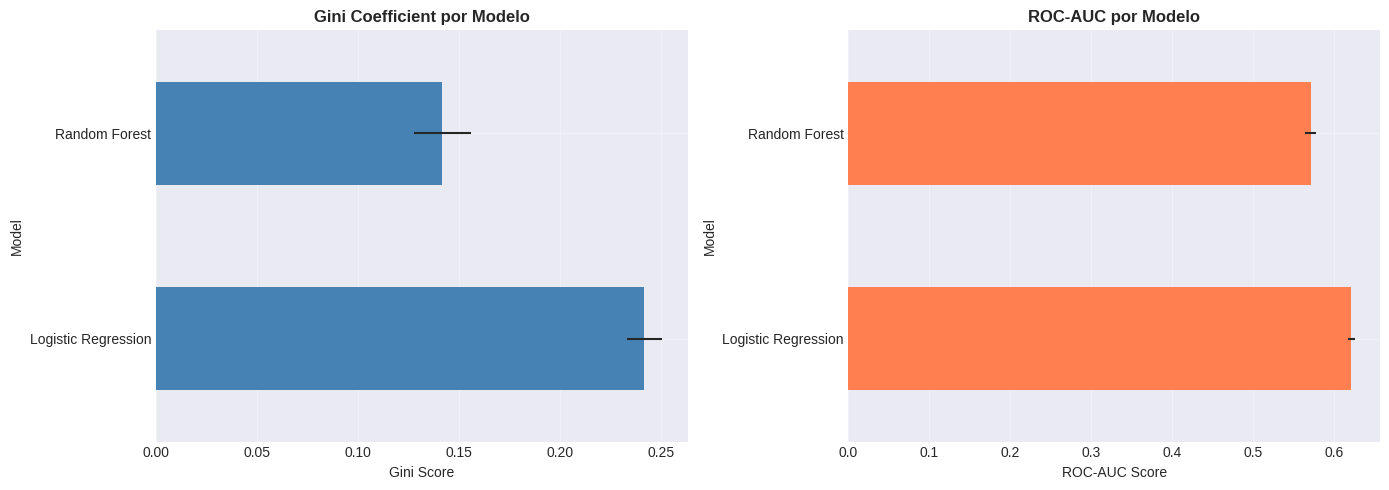

In [61]:
results_df = pd.DataFrame(results).sort_values('Gini_Mean', ascending=False)

print("\n" + "="*70)
print(" RANKING DE MODELOS")
print("="*70)
print(results_df.to_string(index=False))

# Visualizar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Gini Score
results_df.plot(x='Model', y='Gini_Mean', kind='barh', ax=ax1, 
                color='steelblue', xerr='Gini_Std', legend=False)
ax1.set_title('Gini Coefficient por Modelo', fontweight='bold', fontsize=12)
ax1.set_xlabel('Gini Score')
ax1.grid(True, alpha=0.3)

# Gráfico 2: ROC-AUC
results_df.plot(x='Model', y='AUC_Mean', kind='barh', ax=ax2, 
                color='coral', xerr='AUC_Std', legend=False)
ax2.set_title('ROC-AUC por Modelo', fontweight='bold', fontsize=12)
ax2.set_xlabel('ROC-AUC Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [62]:
# Identificar mejor modelo
best_model_name = results_df.iloc[0]['Model']
best_gini = results_df.iloc[0]['Gini_Mean']
best_auc = results_df.iloc[0]['AUC_Mean']

print("\n" + "="*70)
print(" MEJOR MODELO IDENTIFICADO")
print("="*70)
print(f"   Modelo: {best_model_name}")
print(f"   Gini: {best_gini:.4f}")
print(f"   ROC-AUC: {best_auc:.4f}")
print("="*70)


 MEJOR MODELO IDENTIFICADO
   Modelo: Logistic Regression
   Gini: 0.2420
   ROC-AUC: 0.6210


### RANDOM FOREST CON DATOS SIN ESCALAR

Estoy haciendo esto porque random forest funciona mejor con los datos sin escalar y quiero ver si puede ser mejor que la regresion logistica con los datos escalados

In [63]:
# Pipeline RF con datos originales (sin escalar)
# ----------------------------------------------------------------------------
pipeline_rf_unscaled = Pipeline([
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

pipeline_rf_unscaled

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        min_samples_split=5, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

In [64]:
# Evaluar con datos SIN escalar
cv_scores_gini_unscaled = cross_val_score(
    pipeline_rf_unscaled, 
    X_train,  #  SIN ESCALAR
    y_train, 
    cv=skf, 
    scoring=gini_scorer,
    n_jobs=-1,
    verbose=0
)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [65]:
cv_scores_auc_unscaled = cross_val_score(
    pipeline_rf_unscaled, 
    X_train,  #  SIN ESCALAR
    y_train, 
    cv=skf, 
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)
print(f"\n Resultados RF (SIN escalar):")
print(f"   Gini: {cv_scores_gini_unscaled.mean():.4f} (±{cv_scores_gini_unscaled.std():.4f})")
print(f"   ROC-AUC: {cv_scores_auc_unscaled.mean():.4f} (±{cv_scores_auc_unscaled.std():.4f})")
print(f"   Gini por fold: {cv_scores_gini_unscaled.round(4)}")


 Resultados RF (SIN escalar):
   Gini: 0.1398 (±0.0133)
   ROC-AUC: 0.5699 (±0.0066)
   Gini por fold: [0.1542 0.1486 0.1465 0.1175 0.1323]


In [66]:
# Comparación: Escalado vs Sin Escalar
# ----------------------------------------------------------------------------
print("\n" + "="*70)
print(" COMPARACIÓN: Random Forest")
print("="*70)

comparison = pd.DataFrame({
    'Versión': ['RF con escalado', 'RF sin escalar'],
    'Gini_Mean': [0.1419, cv_scores_gini_unscaled.mean()],
    'Gini_Std': [0.0140, cv_scores_gini_unscaled.std()],
    'AUC_Mean': [0.5710, cv_scores_auc_unscaled.mean()],
    'AUC_Std': [0.0070, cv_scores_auc_unscaled.std()]
})

print(comparison.to_string(index=False))

# Calcular mejora
mejora_gini = ((cv_scores_gini_unscaled.mean() - 0.1419) / 0.1419) * 100
mejora_auc = ((cv_scores_auc_unscaled.mean() - 0.5710) / 0.5710) * 100

print(f"\n Mejora con datos sin escalar:")
print(f"   Gini: {mejora_gini:+.2f}%")
print(f"   ROC-AUC: {mejora_auc:+.2f}%")


 COMPARACIÓN: Random Forest
        Versión  Gini_Mean  Gini_Std  AUC_Mean  AUC_Std
RF con escalado   0.141900  0.014000  0.571000 0.007000
 RF sin escalar   0.139821  0.013279  0.569911 0.006639

 Mejora con datos sin escalar:
   Gini: -1.46%
   ROC-AUC: -0.19%


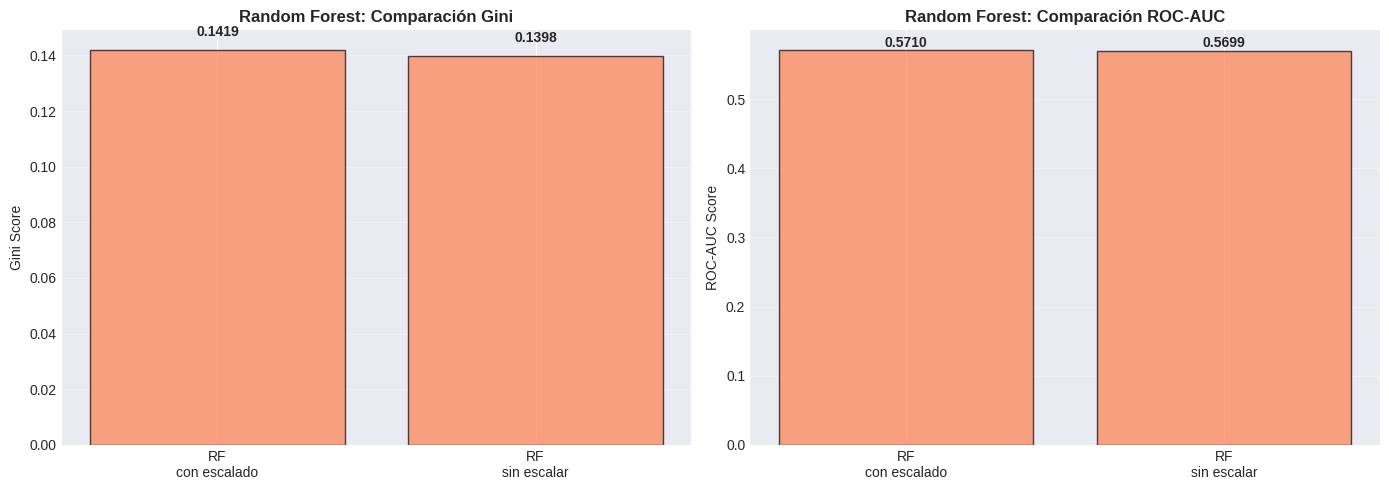

In [67]:
# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Comparación Gini
versions = ['RF\ncon escalado', 'RF\nsin escalar']
gini_values = [0.1419, cv_scores_gini_unscaled.mean()]
colors = ['coral' if g < 0.15 else 'steelblue' if g < 0.20 else 'green' for g in gini_values]

ax1.bar(versions, gini_values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Gini Score')
ax1.set_title('Random Forest: Comparación Gini', fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Agregar valores en las barras
for i, v in enumerate(gini_values):
    ax1.text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

# Gráfico 2: Comparación ROC-AUC
auc_values = [0.5710, cv_scores_auc_unscaled.mean()]
colors_auc = ['coral' if a < 0.58 else 'steelblue' if a < 0.60 else 'green' for a in auc_values]

ax2.bar(versions, auc_values, color=colors_auc, alpha=0.7, edgecolor='black')
ax2.set_ylabel('ROC-AUC Score')
ax2.set_title('Random Forest: Comparación ROC-AUC', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(auc_values):
    ax2.text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



In [68]:
# ============================================================================
# RANKING FINAL DE TODOS LOS MODELOS
# ============================================================================

print("\n" + "="*70)
print(" RANKING FINAL DE TODOS LOS MODELOS")
print("="*70)

all_results = pd.DataFrame([
    {
        'Model': 'Logistic Regression',
        'Data': 'Escalado',
        'Gini_Mean': 0.2420,
        'AUC_Mean': 0.6210
    },
    {
        'Model': 'Random Forest',
        'Data': 'Escalado',
        'Gini_Mean': 0.1419,
        'AUC_Mean': 0.5710
    },
    {
        'Model': 'Random Forest',
        'Data': 'Sin Escalar',
        'Gini_Mean': cv_scores_gini_unscaled.mean(),
        'AUC_Mean': cv_scores_auc_unscaled.mean()
    }
]).sort_values('Gini_Mean', ascending=False)

print(all_results.to_string(index=False))

# Identificar el VERDADERO mejor modelo
best_model_final = all_results.iloc[0]

print("\n" + "="*70)
print(" CAMPEÓN DEFINITIVO")
print("="*70)
print(f"   Modelo: {best_model_final['Model']}")
print(f"   Datos: {best_model_final['Data']}")
print(f"   Gini: {best_model_final['Gini_Mean']:.4f}")
print(f"   ROC-AUC: {best_model_final['AUC_Mean']:.4f}")
print("="*70)

# Actualizar el mejor pipeline según resultado
if best_model_final['Model'] == 'Random Forest' and best_model_final['Data'] == 'Sin Escalar':
    print("\n Random Forest SIN ESCALAR es el GANADOR")
    best_pipeline = pipeline_rf_unscaled
    best_model_name = 'Random Forest (sin escalar)'
    X_train_final = X_train  # Usar datos sin escalar
    X_test_final = X_test
else:
    print("\n Logistic Regression sigue siendo el GANADOR")
    best_pipeline = pipelines['Logistic Regression']
    best_model_name = 'Logistic Regression'
    X_train_final = X_train_scaled  # Usar datos escalados
    X_test_final = X_test_scaled


 RANKING FINAL DE TODOS LOS MODELOS
              Model        Data  Gini_Mean  AUC_Mean
Logistic Regression    Escalado   0.242000  0.621000
      Random Forest    Escalado   0.141900  0.571000
      Random Forest Sin Escalar   0.139821  0.569911

 CAMPEÓN DEFINITIVO
   Modelo: Logistic Regression
   Datos: Escalado
   Gini: 0.2420
   ROC-AUC: 0.6210

 Logistic Regression sigue siendo el GANADOR


Random Forest EMPEORÓ sin escalado

# **PASO 5: ENTRENAMIENTO FINAL**

In [69]:
print(" ENTRENAMIENTO FINAL - LOGISTIC REGRESSION")
print("="*70)

# Confirmando el mejor modelo
best_pipeline = pipelines['Logistic Regression']
best_model_name = 'Logistic Regression'
X_train_final = X_train_scaled  # Usar datos ESCALADOS
X_test_final = X_test_scaled

print(f"\n Modelo seleccionado: {best_model_name}")
print(f"   Gini (CV): 0.2420")
print(f"   ROC-AUC: 0.6210")
print(f"   Features: {X_train_final.shape[1]}")

 ENTRENAMIENTO FINAL - LOGISTIC REGRESSION

 Modelo seleccionado: Logistic Regression
   Gini (CV): 0.2420
   ROC-AUC: 0.6210
   Features: 95


In [70]:
# Entrenar con TODO el conjunto de entrenamiento
# ----------------------------------------------------------------------------
#ESTO PORQUE EB CV YA VALIDO QUE EL MODELO GENERALIZA
print("\n Entrenando con 100,000 muestras...")

best_pipeline.fit(X_train_final, y_train)

print(" Entrenamiento completo")


 Entrenando con 100,000 muestras...
 Entrenamiento completo


In [71]:
print(" EVALUACIÓN EN CONJUNTO DE VALIDACIÓN")
print("="*70)

y_val_pred_proba = best_pipeline.predict_proba(X_val_split)[:, 1]
y_val_pred = best_pipeline.predict(X_val_split)

# Métricas
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

final_gini = normalized_gini(y_val_split, y_val_pred_proba)
final_auc = roc_auc_score(y_val_split, y_val_pred_proba)

print(f"\n Métricas en Validación:")
print(f"   Gini:    {final_gini:.4f}")
print(f"   ROC-AUC: {final_auc:.4f}")

 EVALUACIÓN EN CONJUNTO DE VALIDACIÓN

 Métricas en Validación:
   Gini:    0.2476
   ROC-AUC: 0.6238


In [72]:
print("\n Classification Report:")
print(classification_report(y_val_split, y_val_pred, 
                          target_names=['No Claim (0)', 'Claim (1)'],
                          digits=4))

# Confusion Matrix
cm = confusion_matrix(y_val_split, y_val_pred)
print("\n Confusion Matrix:")
print(f"\n                 Predicted")
print(f"                 No    Claim")
print(f"Actual  No     {cm[0,0]:6,} {cm[0,1]:6,}")
print(f"        Claim  {cm[1,0]:6,} {cm[1,1]:6,}")


 Classification Report:
              precision    recall  f1-score   support

No Claim (0)     0.9726    0.6282    0.7634     19271
   Claim (1)     0.0514    0.5322    0.0937       729

    accuracy                         0.6248     20000
   macro avg     0.5120    0.5802    0.4285     20000
weighted avg     0.9390    0.6248    0.7390     20000


 Confusion Matrix:

                 Predicted
                 No    Claim
Actual  No     12,107  7,164
        Claim     341    388


In [73]:
# Calcular métricas adicionales
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

print(f"\n Métricas Detalladas:")
print(f"   Sensitivity (Recall):  {sensitivity:.4f}   % de claims detectados")
print(f"   Specificity:           {specificity:.4f}   % de no-claims correctos")
print(f"   Precision:             {precision:.4f}   % de predicciones claim correctas")
print(f"   F1-Score:              {f1:.4f}")


 Métricas Detalladas:
   Sensitivity (Recall):  0.5322   % de claims detectados
   Specificity:           0.6282   % de no-claims correctos
   Precision:             0.0514   % de predicciones claim correctas
   F1-Score:              0.0937


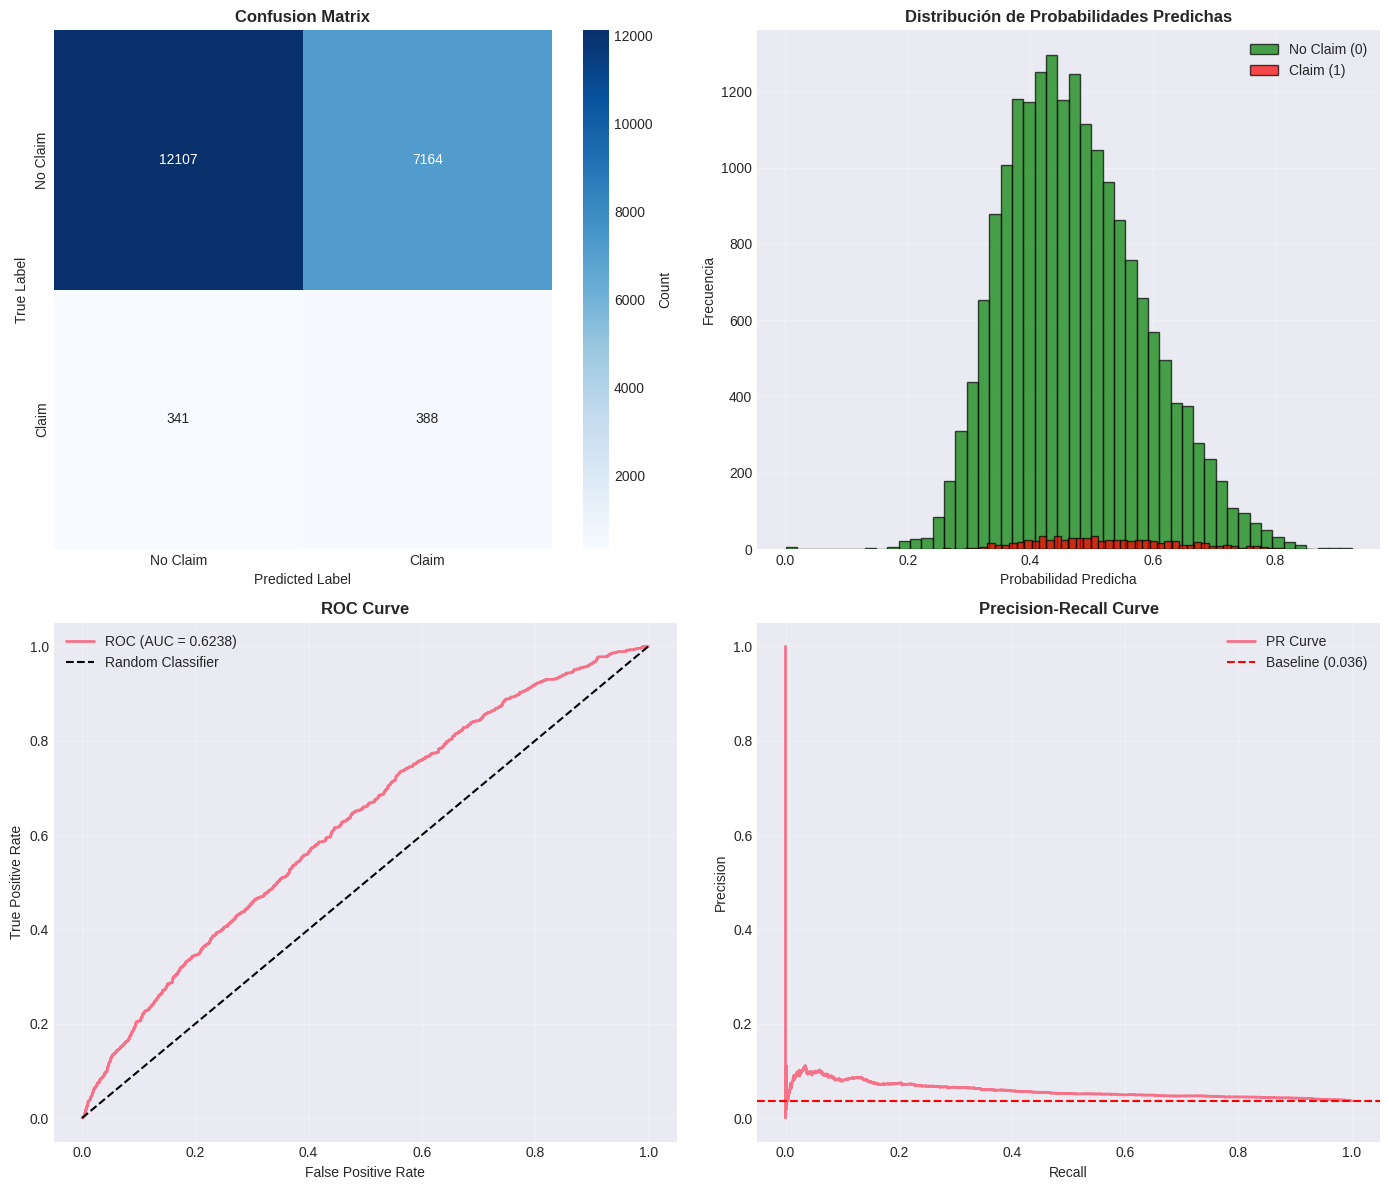

In [74]:
# Visualizaciones
# ----------------------------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
# 1. Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=['No Claim', 'Claim'],
            yticklabels=['No Claim', 'Claim'],
            cbar_kws={'label': 'Count'})
axes[0,0].set_title('Confusion Matrix', fontweight='bold', fontsize=12)
axes[0,0].set_ylabel('True Label')
axes[0,0].set_xlabel('Predicted Label')

# 2. Distribución de probabilidades predichas
axes[0,1].hist(y_val_pred_proba[y_val_split == 0], bins=50, alpha=0.7, 
               label='No Claim (0)', color='green', edgecolor='black')
axes[0,1].hist(y_val_pred_proba[y_val_split == 1], bins=50, alpha=0.7, 
               label='Claim (1)', color='red', edgecolor='black')
axes[0,1].set_title('Distribución de Probabilidades Predichas', fontweight='bold', fontsize=12)
axes[0,1].set_xlabel('Probabilidad Predicha')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val_split, y_val_pred_proba)
axes[1,0].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {final_auc:.4f})')
axes[1,0].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1,0].set_title('ROC Curve', fontweight='bold', fontsize=12)
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_val_split, y_val_pred_proba)
axes[1,1].plot(recall_vals, precision_vals, linewidth=2, label=f'PR Curve')
axes[1,1].axhline(y=y_val_split.mean(), color='r', linestyle='--', 
                  label=f'Baseline ({y_val_split.mean():.3f})')
axes[1,1].set_title('Precision-Recall Curve', fontweight='bold', fontsize=12)
axes[1,1].set_xlabel('Recall')
axes[1,1].set_ylabel('Precision')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

CON LA MATRIZ DE CONFUSION VEMOS QUE SE GENERO MUCHOS FALSOS POSIVOS ESTO PORQUE NO MANEJE BIEN EL DESBALANCEO DE LAS CLASES XD PERO LO INTENTAMOS JAJA

In [75]:
print(" GENERANDO PREDICCIONES PARA TEST SET")
print("="*70)

test_predictions = best_pipeline.predict_proba(X_test_final)[:, 1]

print(f"\n {len(test_predictions):,} predicciones generadas")
print(f"\n Estadísticas de las predicciones:")
print(f"   Min:     {test_predictions.min():.6f}")
print(f"   Q1:      {np.percentile(test_predictions, 25):.6f}")
print(f"   Median:  {np.median(test_predictions):.6f}")
print(f"   Mean:    {test_predictions.mean():.6f}")
print(f"   Q3:      {np.percentile(test_predictions, 75):.6f}")
print(f"   Max:     {test_predictions.max():.6f}")
print(f"   Std:     {test_predictions.std():.6f}")

 GENERANDO PREDICCIONES PARA TEST SET

 50,000 predicciones generadas

 Estadísticas de las predicciones:
   Min:     0.000033
   Q1:      0.392019
   Median:  0.462859
   Mean:    0.473701
   Q3:      0.545559
   Max:     0.936726
   Std:     0.112333


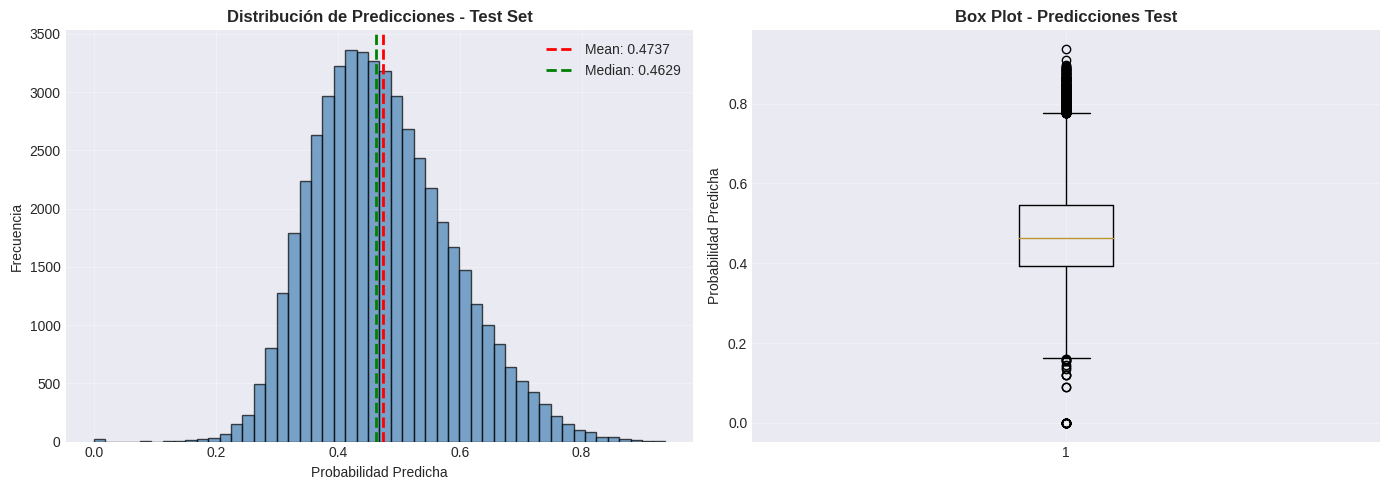

In [76]:
# Distribución de predicciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
ax1.hist(test_predictions, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(test_predictions.mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {test_predictions.mean():.4f}')
ax1.axvline(np.median(test_predictions), color='green', linestyle='--', 
            linewidth=2, label=f'Median: {np.median(test_predictions):.4f}')
ax1.set_title('Distribución de Predicciones - Test Set', fontweight='bold', fontsize=12)
ax1.set_xlabel('Probabilidad Predicha')
ax1.set_ylabel('Frecuencia')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot
ax2.boxplot(test_predictions, vert=True)
ax2.set_title('Box Plot - Predicciones Test', fontweight='bold', fontsize=12)
ax2.set_ylabel('Probabilidad Predicha')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [77]:
# Crear archivo de submission
# ----------------------------------------------------------------------------
print("\n" + "="*70)
print(" CREANDO ARCHIVO DE SUBMISSION")
print("="*70)

submission = pd.DataFrame({
    'id': test_ids,
    'target': test_predictions
})

# Guardar
submission.to_csv('submission.csv', index=False)

print(f"\n Archivo 'submission.csv' creado exitosamente")
print(f"   Shape: {submission.shape}")
print(f"   Columnas: {list(submission.columns)}")

print(f"\n Primeras 10 predicciones:")
print(submission.head(10).to_string(index=False))

print(f"\n Últimas 10 predicciones:")
print(submission.tail(10).to_string(index=False))


 CREANDO ARCHIVO DE SUBMISSION

 Archivo 'submission.csv' creado exitosamente
   Shape: (50000, 2)
   Columnas: ['id', 'target']

 Primeras 10 predicciones:
     id   target
 820692 0.325877
 587380 0.426162
 668609 0.449285
 507084 0.389617
1460105 0.586380
1018491 0.551351
 262142 0.392437
1018884 0.488374
1045589 0.379385
 306591 0.644356

 Últimas 10 predicciones:
     id   target
 638605 0.399585
 900385 0.461528
  78499 0.474256
 977947 0.397423
 197410 0.486130
1056811 0.543329
 934828 0.386569
 462723 0.472177
1126035 0.330799
1414712 0.613188


In [78]:
# Verificaciones finales
# ----------------------------------------------------------------------------
print("\n Verificaciones finales:")

checks = {
    'Número correcto de predicciones': len(submission) == len(test_ids),
    'Sin IDs duplicados': submission['id'].nunique() == len(test_ids),
    'Predicciones en rango [0,1]': submission['target'].between(0, 1).all(),
    'Sin valores faltantes': not submission.isnull().any().any(),
    'IDs coinciden con test': (submission['id'].values == test_ids.values).all()
}

for check, passed in checks.items():
    status = "BIEN" if passed else "MAL"
    print(f"   {status} {check}")

if all(checks.values()):
    print("\n Todas las verificaciones pasaron - Listo para submission")
else:
    print("\n Algunas verificaciones fallaron - Revisar")


 Verificaciones finales:
   BIEN Número correcto de predicciones
   BIEN Sin IDs duplicados
   BIEN Predicciones en rango [0,1]
   BIEN Sin valores faltantes
   BIEN IDs coinciden con test

 Todas las verificaciones pasaron - Listo para submission


In [79]:
# Resumen final
# ----------------------------------------------------------------------------
print("\n" + "="*70)
print(" PROCESO COMPLETO")
print("="*70)

print(f"\n RESUMEN FINAL:")
print(f"   Modelo:              {best_model_name}")
print(f"   Gini (CV):           0.2420")
print(f"   ROC-AUC (CV):        0.6210")
print(f"   Gini (Validación):   {final_gini:.4f}")
print(f"   ROC-AUC (Validación): {final_auc:.4f}")
print(f"   Features usadas:     {X_train_final.shape[1]}")
print(f"   Predicciones:        {len(test_predictions):,}")
print(f"   Archivo:             submission.csv")

print("\n LISTO PARA SUBIR A KAGGLE")
print("\n SIGUIENTE PASOS A HACER :")
print("   1. Descargar 'submission.csv'")
print("   2. Ir a la competencia en Kaggle")
print("   3. Submit predictions")
print("   4. ver en que lugar de score queamos en el leaderboard!")

print("\n" + "="*70)


 PROCESO COMPLETO

 RESUMEN FINAL:
   Modelo:              Logistic Regression
   Gini (CV):           0.2420
   ROC-AUC (CV):        0.6210
   Gini (Validación):   0.2476
   ROC-AUC (Validación): 0.6238
   Features usadas:     95
   Predicciones:        50,000
   Archivo:             submission.csv

 LISTO PARA SUBIR A KAGGLE

 SIGUIENTE PASOS A HACER :
   1. Descargar 'submission.csv'
   2. Ir a la competencia en Kaggle
   3. Submit predictions
   4. ver en que lugar de score queamos en el leaderboard!

